<a href="https://colab.research.google.com/github/huongtran2104/Capstone-Project/blob/main/Final_Project_Tr%E1%BA%A7n_Th%E1%BB%8B_Thu_H%C6%B0%C6%A1ng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TOPIC: Identify components affect conversion activities by using linear regression model**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df=pd.read_csv('/content/KAG_conversion_data.csv')

## **DATA PROFILING**

### **Descriptive statistics**

In [3]:
df.sample(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
736,1121527,1178,144611,40-44,M,29,741143,120,179.620001,4,1
571,1121185,1178,144549,30-34,M,27,260699,31,54.099999,5,2
355,780318,936,116183,45-49,F,29,162341,56,77.080000,3,0
884,1121856,1178,144666,30-34,F,63,1296189,212,343.259994,14,4
849,1121782,1178,144654,30-34,F,22,26340,3,4.220000,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


### **Fixing Datatypes**

In [5]:
df["age"]=df["age"].astype("category")
df["gender"]=df["gender"].astype("category")
df["interest"]=df["interest"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ad_id                1143 non-null   int64   
 1   xyz_campaign_id      1143 non-null   int64   
 2   fb_campaign_id       1143 non-null   int64   
 3   age                  1143 non-null   category
 4   gender               1143 non-null   category
 5   interest             1143 non-null   category
 6   Impressions          1143 non-null   int64   
 7   Clicks               1143 non-null   int64   
 8   Spent                1143 non-null   float64 
 9   Total_Conversion     1143 non-null   int64   
 10  Approved_Conversion  1143 non-null   int64   
dtypes: category(3), float64(1), int64(7)
memory usage: 76.6 KB


### **Checking consistency**

In [6]:
df["Approved_Conversion"].unique()

array([ 1,  0,  3,  2, 14,  5, 10, 17, 21,  4,  9,  7,  8, 12,  6, 13])

In [7]:
df["ad_id"].unique()

array([ 708746,  708749,  708771, ..., 1314412, 1314414, 1314415])

In [8]:
len(df["ad_id"].unique())

1143

In [9]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178])

In [10]:
df["fb_campaign_id"].unique()

array([103916, 103917, 103920, 103928, 103929, 103940, 103941, 103951,
       103952, 103955, 103962, 103965, 103968, 103976, 103978, 103979,
       103988, 103989, 104012, 104013, 104034, 104049, 104061, 104085,
       104108, 104109, 104133, 104140, 104185, 104205, 104220, 104228,
       104229, 104230, 104239, 104252, 104265, 104270, 104272, 104285,
       104287, 104328, 104396, 104419, 104423, 104438, 104467, 108654,
       108655, 108660, 108664, 108665, 108668, 108672, 108678, 108680,
       108683, 108686, 108689, 108690, 108691, 108692, 108716, 108720,
       108729, 108730, 108740, 108742, 108750, 108752, 108753, 108761,
       108762, 108764, 108766, 108770, 108774, 108776, 108781, 108786,
       108788, 108791, 108792, 108793, 108794, 108797, 108804, 108809,
       108810, 108811, 108817, 108818, 108822, 108823, 108826, 108827,
       108834, 108836, 109448, 109451, 109452, 109470, 109472, 109473,
       109498, 109507, 109553, 109565, 109601, 109629, 109633, 109637,
      

In [11]:
len(df["fb_campaign_id"].unique())

691

**Key takeaway:**
- the dataset indicates the performance of 3 marketing campaigns with many supplement campaign ads and facebook campaigns.
- Each row has one unique ad_id
- One fb_campaign_id can contain many ad_ids


### **Checking duplicates**

In [12]:
df.duplicated().sum()

np.int64(0)

### **Checking missing values**

In [13]:
df.isnull().sum()

,0
ad_id,0
xyz_campaign_id,0
fb_campaign_id,0
age,0
gender,0
interest,0
Impressions,0
Clicks,0
Spent,0
Total_Conversion,0


### **Qualifying the data**

To simplify the data analysis, I will replace 3 main campaign ids with encoded names.

In [14]:
df["xyz_campaign_id"]=df["xyz_campaign_id"].replace(916,"campaign_a").replace(936,"campaign_b").replace(1178,"campaign_c")
df.sample(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
815,1121695,campaign_c,144639,45-49,M,32,29455,3,4.770000,1,0
1046,1122313,campaign_c,144742,45-49,F,64,358261,91,130.360001,1,0
170,747678,campaign_b,110914,45-49,M,21,370,0,0.000000,1,1
332,779488,campaign_b,116039,45-49,M,65,1006,0,0.000000,1,0
599,1121252,campaign_c,144565,30-34,M,63,11139,0,0.000000,1,1


In [15]:
df["xyz_campaign_id"].unique()

array(['campaign_a', 'campaign_b', 'campaign_c'], dtype=object)

### **Detecting outliers**

In [16]:
df.describe()

,ad_id,fb_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,133783.989501,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,20500.308622,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,103916.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,115716.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,144549.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,144657.500000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,179982.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [17]:
# Outliers dectection of Impressions
Q1 = df['Impressions'].quantile(0.25)
Q3 = df['Impressions'].quantile(0.75)

IQR = Q3 - Q1

lower_bound_Impressions = Q1 - 1.5 * IQR
upper_bound_Impressions = Q3 + 1.5 * IQR

print(f"Lower bound of Impressions: {lower_bound_Impressions}")
print(f"Upper bound of Impressions: {upper_bound_Impressions}")

Lower bound of Impressions: -316394.75
Upper bound of Impressions: 544667.25


In [18]:
outliers_count_iqr = ((df['Impressions'] < lower_bound_Impressions) |
                      (df['Impressions'] > upper_bound_Impressions)).sum()

percentage_outliers_iqr = (outliers_count_iqr / len(df)) * 100

print(f"Number of ouliers (IQR method): {outliers_count_iqr}")
print(f"Percentage of outliers (IQR method): {percentage_outliers_iqr:.2f}%")

Number of ouliers (IQR method): 123
Percentage of outliers (IQR method): 10.76%


In [19]:
# Outliers dectection of Clicks
Q1 = df['Clicks'].quantile(0.25)
Q3 = df['Clicks'].quantile(0.75)

IQR = Q3 - Q1

lower_bound_Clicks = Q1 - 1.5 * IQR
upper_bound_Clicks = Q3 + 1.5 * IQR

print(f"Lower bound of Clicks: {lower_bound_Clicks}")
print(f"Upper bound of Clicks: {upper_bound_Clicks}")

Lower bound of Clicks: -53.75
Upper bound of Clicks: 92.25


In [20]:
outliers_count_iqr = ((df['Clicks'] < lower_bound_Clicks) |
                      (df['Clicks'] > upper_bound_Clicks)).sum()

percentage_outliers_iqr = (outliers_count_iqr / len(df)) * 100

print(f"Number of ouliers (IQR method): {outliers_count_iqr}")
print(f"Percentage of outliers (IQR method): {percentage_outliers_iqr:.2f}%")

Number of ouliers (IQR method): 127
Percentage of outliers (IQR method): 11.11%


In [21]:
# Outliers dectection of Spent
Q1 = df['Spent'].quantile(0.25)
Q3 = df['Spent'].quantile(0.75)

IQR = Q3 - Q1

lower_bound_Spent = Q1 - 1.5 * IQR
upper_bound_Spent = Q3 + 1.5 * IQR

print(f"Lower bound of Spent: {lower_bound_Spent}")
print(f"Upper bound of Spent: {upper_bound_Spent}")

Lower bound of Spent: -86.337499825
Upper bound of Spent: 147.842499759


In [22]:
outliers_count_iqr = ((df['Spent'] < lower_bound_Spent) |
                      (df['Spent'] > upper_bound_Spent)).sum()

percentage_outliers_iqr = (outliers_count_iqr / len(df)) * 100

print(f"Number of ouliers (IQR method): {outliers_count_iqr}")
print(f"Percentage of outliers (IQR method): {percentage_outliers_iqr:.2f}%")

Number of ouliers (IQR method): 125
Percentage of outliers (IQR method): 10.94%


In [23]:
# Outliers dectection of Total_Conversion
Q1 = df['Total_Conversion'].quantile(0.25)
Q3 = df['Total_Conversion'].quantile(0.75)

IQR = Q3 - Q1

lower_bound_Total_Conversion = Q1 - 1.5 * IQR
upper_bound_Total_Conversion = Q3 + 1.5 * IQR

print(f"Lower bound of Total_Conversion: {lower_bound_Total_Conversion}")
print(f"Upper bound of Total_Conversion: {upper_bound_Total_Conversion}")

Lower bound of Total_Conversion: -2.0
Upper bound of Total_Conversion: 6.0


In [24]:
outliers_count_iqr = ((df['Total_Conversion'] < lower_bound_Total_Conversion) |
                      (df['Total_Conversion'] > upper_bound_Total_Conversion)).sum()

percentage_outliers_iqr = (outliers_count_iqr / len(df)) * 100

print(f"Number of ouliers (IQR method): {outliers_count_iqr}")
print(f"Percentage of outliers (IQR method): {percentage_outliers_iqr:.2f}%")

Number of ouliers (IQR method): 105
Percentage of outliers (IQR method): 9.19%


In [25]:
# Outliers dectection of Approved_Conversion
Q1 = df['Approved_Conversion'].quantile(0.25)
Q3 = df['Approved_Conversion'].quantile(0.75)

IQR = Q3 - Q1

lower_bound_Approved_Conversion = Q1 - 1.5 * IQR
upper_bound_Approved_Conversion = Q3 + 1.5 * IQR

print(f"Lower bound of Approved_Conversion: {lower_bound_Approved_Conversion}")
print(f"Upper bound of Approved_Conversion: {upper_bound_Approved_Conversion}")

Lower bound of Approved_Conversion: -1.5
Upper bound of Approved_Conversion: 2.5


In [26]:
outliers_count_iqr = ((df['Approved_Conversion'] < lower_bound_Approved_Conversion) |
                      (df['Approved_Conversion'] > upper_bound_Approved_Conversion)).sum()

percentage_outliers_iqr = (outliers_count_iqr / len(df)) * 100

print(f"Number of ouliers (IQR method): {outliers_count_iqr}")
print(f"Percentage of outliers (IQR method): {percentage_outliers_iqr:.2f}%")

Number of ouliers (IQR method): 95
Percentage of outliers (IQR method): 8.31%


**Note:** Most of the components account for 8%-20% of the whole dataset. Removing too many outliers can make the model unreliable. While ignoring it can lead to over-adjustment. Eliminating around 20% of 1000 inputs is a big number. Therefore, I will choose another method to minimize the influence of outliers.

But first, I will have a glance at outliers using IQR method.

In [27]:
outliers_df_iqr = df[(df['Impressions'] < lower_bound_Impressions) |
                      (df['Impressions'] > upper_bound_Impressions) |
                     (df['Clicks'] < lower_bound_Clicks) |
                      (df['Clicks'] > upper_bound_Clicks) |
                     (df['Spent'] < lower_bound_Spent) |
                      (df['Spent'] > upper_bound_Spent) |
                     (df['Total_Conversion'] < lower_bound_Total_Conversion) |
                      (df['Total_Conversion'] > upper_bound_Total_Conversion) |
                     (df['Approved_Conversion'] < lower_bound_Approved_Conversion) |
                      (df['Approved_Conversion'] > upper_bound_Approved_Conversion)]

outliers_df_iqr.sort_values(by="Total_Conversion", ascending=False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
525,1121100,campaign_c,144532,30-34,M,15,3052003,340,639.949998,60,17
528,1121104,campaign_c,144533,30-34,M,16,2080666,202,360.150001,40,21
860,1121814,campaign_c,144659,30-34,F,27,2223278,421,612.300003,38,13
574,1121196,campaign_c,144552,30-34,M,28,1392288,206,358.550003,31,7
1116,1314387,campaign_c,179954,40-44,F,101,696612,152,223.189995,31,9
...,...,...,...,...,...,...,...,...,...,...,...
1043,1122310,campaign_c,144742,45-49,F,64,536457,136,193.659999,2,1
207,776325,campaign_b,115485,45-49,F,16,452398,114,180.220001,1,0
1003,1122209,campaign_c,144725,45-49,F,18,890295,227,332.989999,1,0
1015,1122233,campaign_c,144729,45-49,F,22,436943,109,145.819997,1,1


📌 **Key takeaway:**
There are 184 values of outliers, equivalent with 16% of the total inputs. Most of them came from campaign_c, suggesting that this campaign is the biggest one of that company. The outliers may bring many insightful information, ignoring these valuable information may lead to misinterpretation in the further analysis.

> Therefore, in the next EDA analysis, I will keep all the values to ensure realisticity and reduce misinterpretation of important data.

> Meanwhile, in the data modeling, I will filter 99% of the input to eliminate the most significant values.

## **EXPLORATORY DATA ANALYSIS (EDA)**

### **General infomation**

#### Boxplots

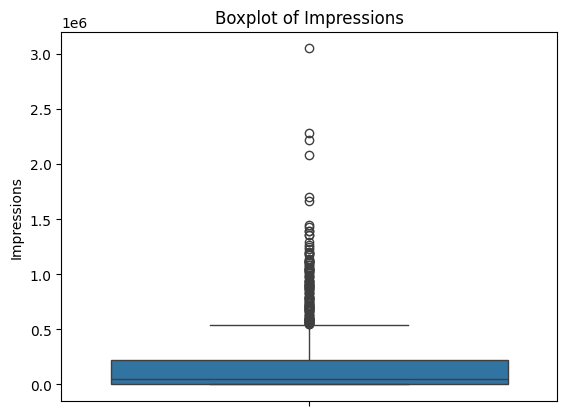

In [28]:
sns.boxplot(df['Impressions'])
plt.title('Boxplot of Impressions')
plt.show()

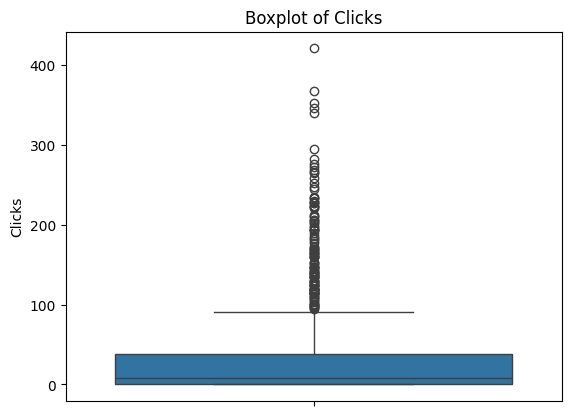

In [29]:
sns.boxplot(df['Clicks'])
plt.title('Boxplot of Clicks')
plt.show()

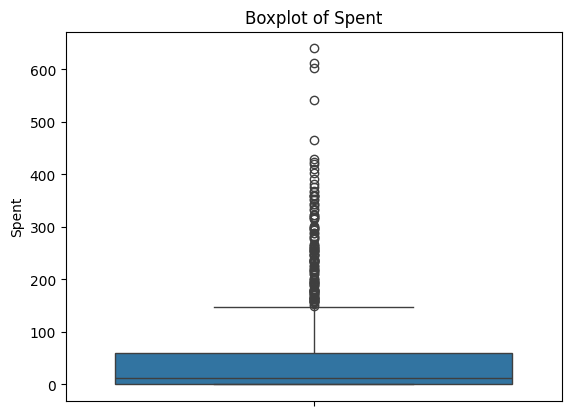

In [30]:
sns.boxplot(df['Spent'])
plt.title('Boxplot of Spent')
plt.show()

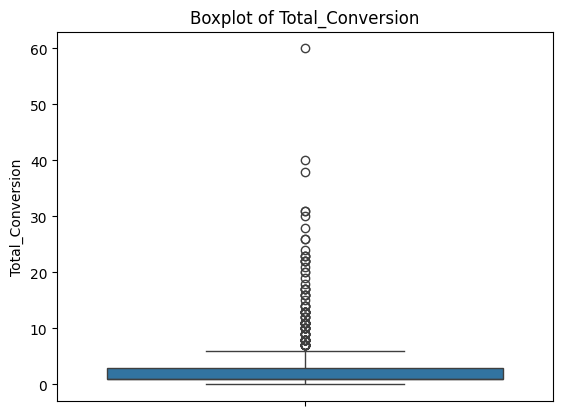

In [31]:
sns.boxplot(df['Total_Conversion'])
plt.title('Boxplot of Total_Conversion')
plt.show()

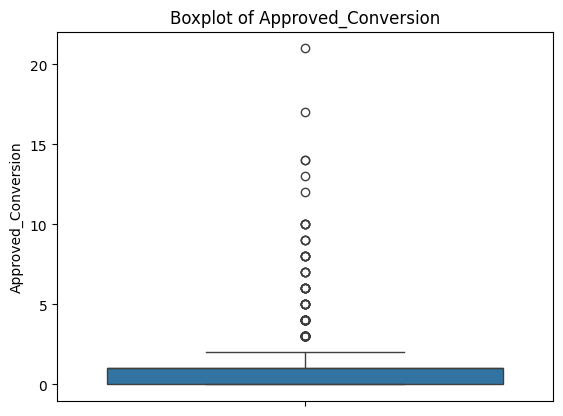

In [32]:
sns.boxplot(df['Approved_Conversion'])
plt.title('Boxplot of Approved_Conversion')
plt.show()

#### Demographic:

In [33]:
gender_distribution=df["gender"].value_counts().reset_index()
gender_distribution

,gender,count
0,M,592
1,F,551


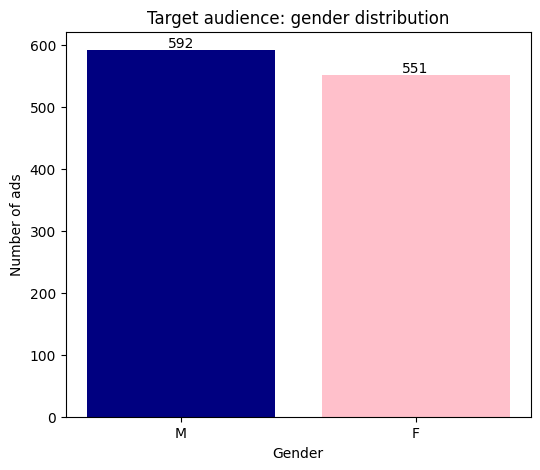

In [34]:
plt.figure(figsize=(6, 5))
bar=plt.bar(gender_distribution["gender"], gender_distribution["count"], color=['navy', 'pink'])
plt.title('Target audience: gender distribution')
plt.xlabel('Gender')
plt.ylabel('Number of ads')
for bar in bar:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=10)
plt.show()

In [35]:
age_distribution=df["age"].value_counts().reset_index()
age_distribution

,age,count
0,30-34,426
1,45-49,259
2,35-39,248
3,40-44,210


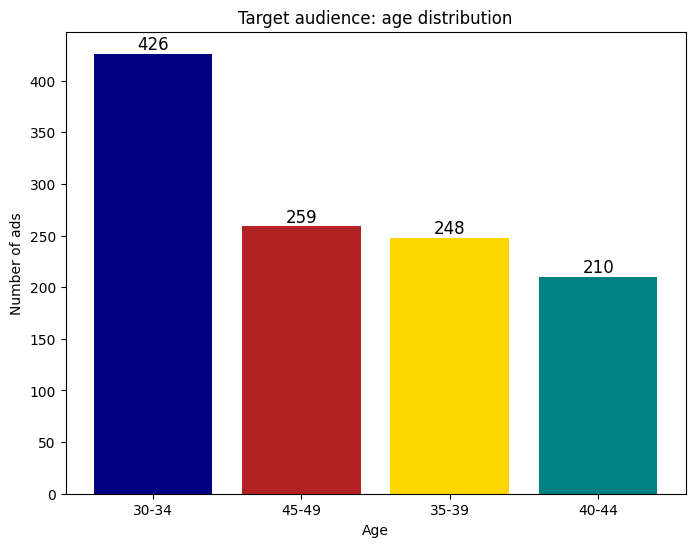

In [36]:
plt.figure(figsize=(8, 6))
bar=plt.bar(age_distribution["age"], age_distribution["count"], color=['navy', 'firebrick', "gold", "teal"])
plt.title('Target audience: age distribution')
plt.xlabel('Age')
plt.ylabel('Number of ads')
for bar in bar:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=12)
plt.show()

📌 **Key takeaway:**

**Demographic patterns:**
- There are more ads targeted to males than females. But the difference is not significant.
- Primary target audience: Age: 30-34 years old
- Secondary target audience: Age: 45-49 years old

**Target audience throughout each campaign:**
- Campaign_a: more ads for males aged from 30-34
- Campaign_b: more ads for females aged from 30-34
- Campaign_c: more ads for males aged from 30-34


In [37]:
total_ad_by_campaign = df.groupby(['xyz_campaign_id'])["ad_id"].count().reset_index()
total_ad_by_campaign

,xyz_campaign_id,ad_id
0,campaign_a,54
1,campaign_b,464
2,campaign_c,625


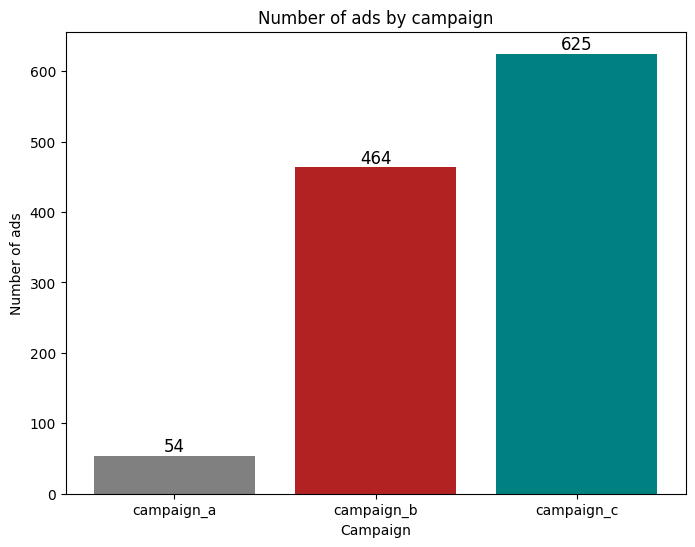

In [38]:
plt.figure(figsize=(8, 6))
bar=plt.bar(total_ad_by_campaign["xyz_campaign_id"], total_ad_by_campaign["ad_id"], color=['gray', 'firebrick', "teal"])
plt.title('Number of ads by campaign')
plt.xlabel('Campaign')
plt.ylabel('Number of ads')
for bar in bar:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=12)
plt.show()

In [39]:
avg_spent_cpn = df.groupby('xyz_campaign_id')['Spent'].sum().reset_index().round(3)
avg_spent_cpn

,xyz_campaign_id,Spent
0,campaign_a,149.71
1,campaign_b,2893.37
2,campaign_c,55662.15


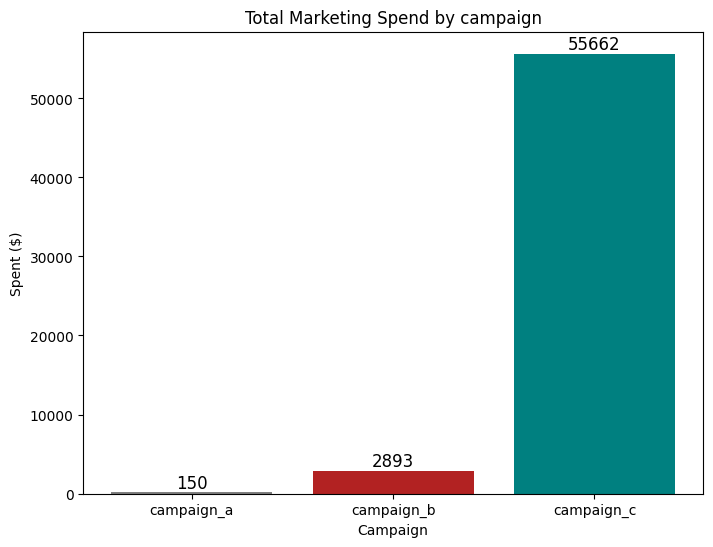

In [40]:
plt.figure(figsize=(8, 6))
bar = plt.bar(avg_spent_cpn["xyz_campaign_id"], avg_spent_cpn["Spent"], color=['gray', 'firebrick', "teal"])
plt.title('Total Marketing Spend by campaign')
plt.xlabel('Campaign')
plt.ylabel('Spent ($)')
for bar in bar:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=12)

plt.show()

In [41]:
total_ad_by_gender_campaign = df.groupby(['xyz_campaign_id', 'gender']).agg({'ad_id': 'count'})
total_ad_by_gender_campaign

/tmp/ipython-input-3565745697.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_ad_by_gender_campaign = df.groupby(['xyz_campaign_id', 'gender']).agg({'ad_id': 'count'})


ad_id
xyz_campaign_id gender       
campaign_a      F          19
                M          35
campaign_b      F         256
                M         208
campaign_c      F         276
                M         349

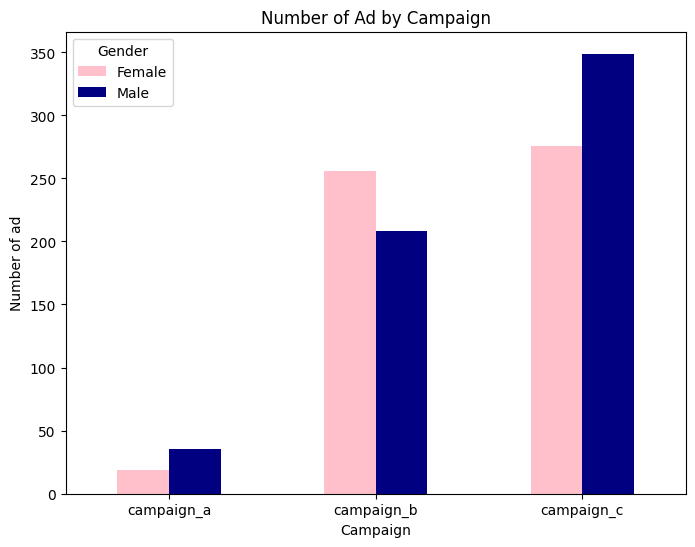

In [42]:
pivot_df = total_ad_by_gender_campaign.unstack(level='gender')
pivot_df.columns = ["Female", "Male"]

pivot_df.plot(kind='bar', figsize=(8,6), color=['pink', 'navy'])

plt.title("Number of Ad by Campaign")
plt.xlabel("Campaign")
plt.ylabel("Number of ad")
plt.legend(title="Gender")
plt.xticks(rotation=0)

plt.show()

In [43]:
total_ad_by_age_campaign = df.groupby(['xyz_campaign_id', 'age']).agg({'ad_id': 'count'})
total_ad_by_age_campaign

/tmp/ipython-input-706722222.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_ad_by_age_campaign = df.groupby(['xyz_campaign_id', 'age']).agg({'ad_id': 'count'})


ad_id
xyz_campaign_id age         
campaign_a      30-34     29
                35-39     12
                40-44      6
                45-49      7
campaign_b      30-34    196
                35-39     89
                40-44     75
                45-49    104
campaign_c      30-34    201
                35-39    147
                40-44    129
                45-49    148

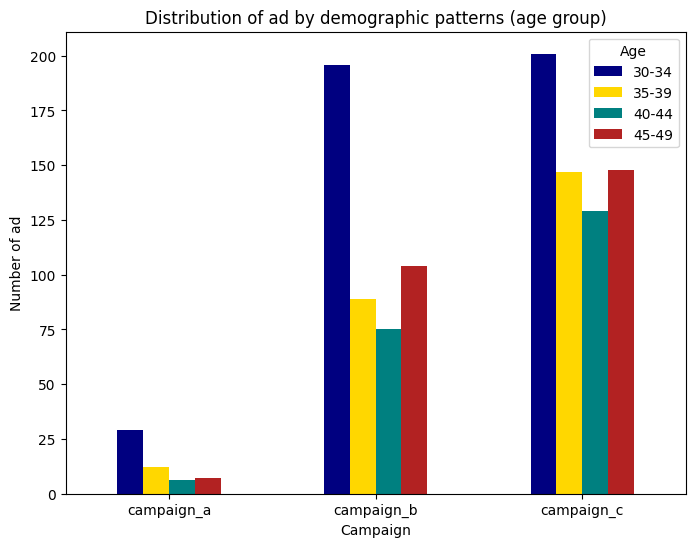

In [44]:
pivot_df = total_ad_by_age_campaign.unstack(level='age')
pivot_df.columns = ["30-34", "35-39","40-44","45-49"]

pivot_df.plot(kind='bar', figsize=(8,6), color=['navy', 'gold', "teal", "firebrick"])

plt.title("Distribution of ad by demographic patterns (age group)")
plt.xlabel("Campaign")
plt.ylabel("Number of ad")
plt.legend(title="Age")
plt.xticks(rotation=0)

plt.show()

📌 **Key takeaway:**

**Demographic Patterns:**

- The primary target audience falls within the 30–34 age group, while the secondary audience is 45–49 years old.
- The majority of ads in Campaign B were targeted toward female audiences, whereas Campaigns A and C primarily focused on male audiences.

**Defining strategies of each campaign:**

- Campaign C represents the company’s largest project, with the highest overall investment and activity level. This project may follow the **mass targeting strategies**.
- Although Campaign B also had a high number of ads (approximately 80% of Campaign C’s volume), its spending accounted for only about 5% of Campaign C’s total. This indicates that Campaign B prioritized **organic engagement and cost efficiency rather than heavy paid promotion**.
- Campaign A operated with limited investment and smaller scale, suggesting a **niche targeting strategy** that focuses on a specific audience segment to maximize cost efficiency while maintaining solid performance.

### **Engagement**

---



In [45]:
female_df = df[df['gender'] == 'F']
male_df = df[df['gender'] == 'M']

In [46]:
df_3034 = df[df['age'] == '30-34']
df_3539 = df[df['age'] == '35-39']
df_4044 = df[df['age'] == '40-44']
df_4549 = df[df['age'] == '45-49']

In [47]:
cpn_a=df[df["xyz_campaign_id"]=="campaign_a"]
cpn_b=df[df["xyz_campaign_id"]=="campaign_b"]
cpn_c=df[df["xyz_campaign_id"]=="campaign_c"]

#### Interest:

**Note:** values symbolized interest code that each ad belongs to, not numeric values.

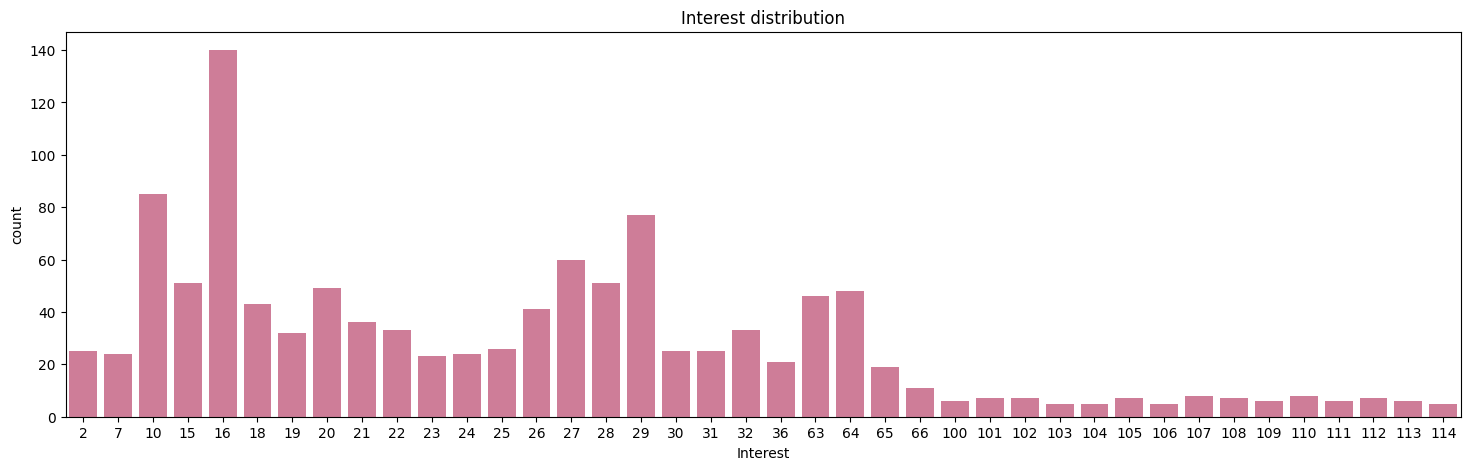

In [48]:
plt.figure(figsize=(18, 5))
sns.countplot(x ='interest', data = df, color="palevioletred")
plt.title('Interest distribution')
plt.xlabel('Interest')
plt.show()

📌 **Key takeaway:** Top 3 interest: 16, 10 and 29.

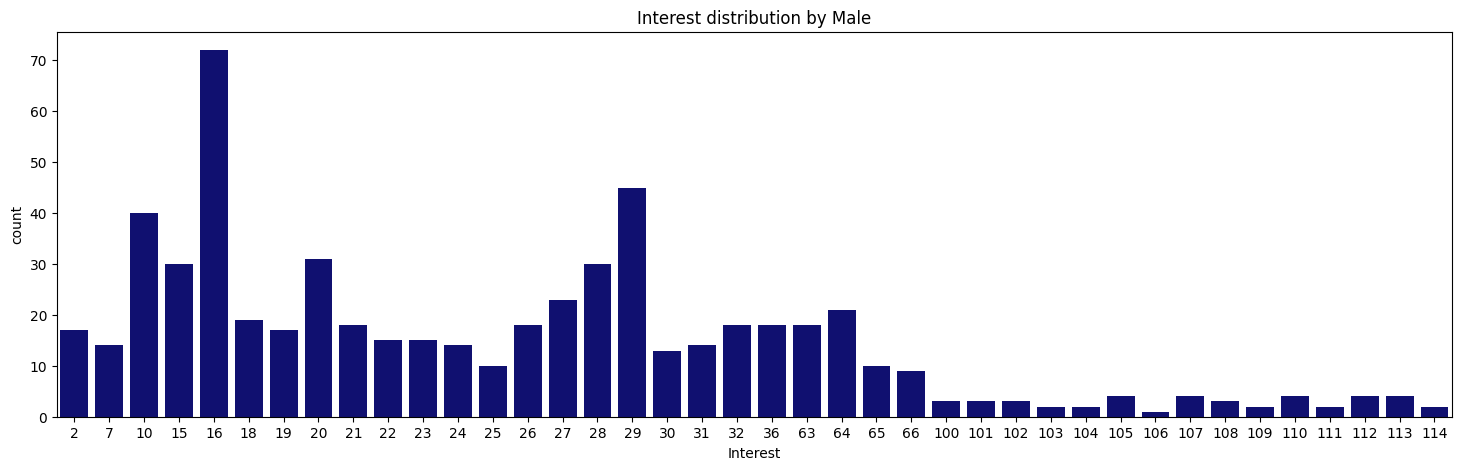

In [49]:
plt.figure(figsize=(18, 5))
sns.countplot(x ='interest', data = male_df, color="navy")
plt.title('Interest distribution by Male')
plt.xlabel('Interest')
plt.show()

📌 **Key takeaway:** Top 3 interest in the campaign for male: 16, 29 and 10

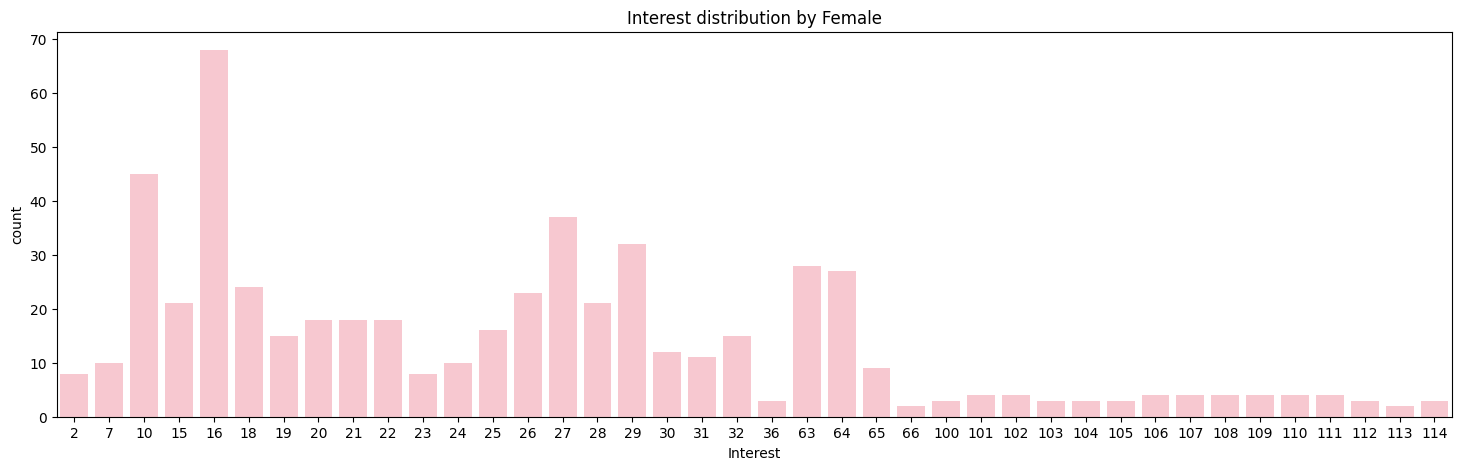

In [50]:
plt.figure(figsize=(18, 5))
sns.countplot(x ='interest', data = female_df, color="pink")
plt.title('Interest distribution by Female')
plt.xlabel('Interest')
plt.show()

📌 **Key takeaway:** Top 3 interest in the campaign for female: 16, 10 and 27

**Conclusion:** Develop more content aligned with top interests (#16, #10,#27 and #29) to maximize relevance and engagement.

#### Impressions:

In [51]:
avg_Impressions_cpn = df.groupby('xyz_campaign_id')['Impressions'].mean().reset_index().round(3)
avg_Impressions_cpn

,xyz_campaign_id,Impressions
0,campaign_a,8943.056
1,campaign_b,17517.644
2,campaign_c,327717.946


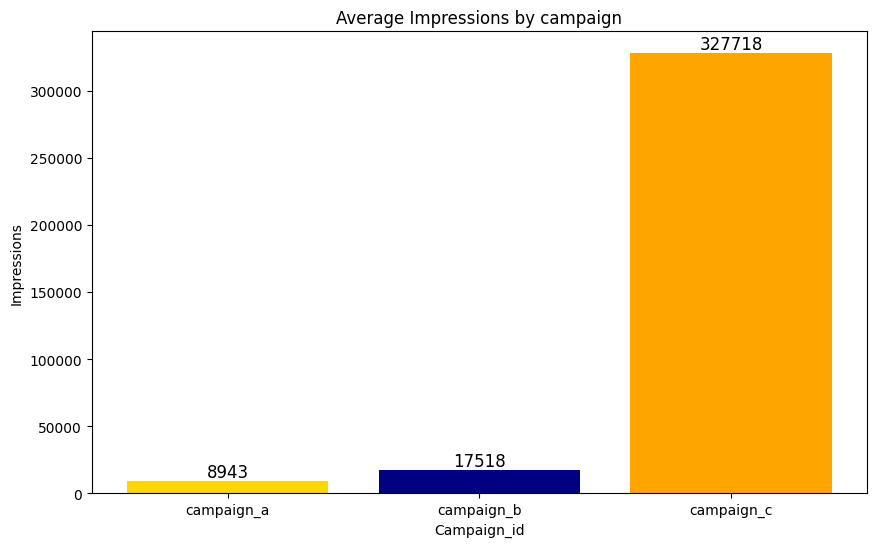

In [52]:
plt.figure(figsize=(10, 6))
bar=plt.bar(avg_Impressions_cpn["xyz_campaign_id"], avg_Impressions_cpn["Impressions"], color=["gold","navy","orange"])
plt.title('Average Impressions by campaign')
plt.xlabel('Campaign_id')
plt.ylabel('Impressions')

for bar in bar:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=12)

plt.show()

In [53]:
impressions_by_gender_campaign = df.groupby(['xyz_campaign_id', 'gender']).agg({'Impressions': 'mean'})
impressions_by_gender_campaign

/tmp/ipython-input-725600881.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  impressions_by_gender_campaign = df.groupby(['xyz_campaign_id', 'gender']).agg({'Impressions': 'mean'})


Impressions
xyz_campaign_id gender               
campaign_a      F        10372.684211
                M         8166.971429
campaign_b      F        24571.117188
                M         8836.447115
campaign_c      F       392665.072464
                M       276355.747851

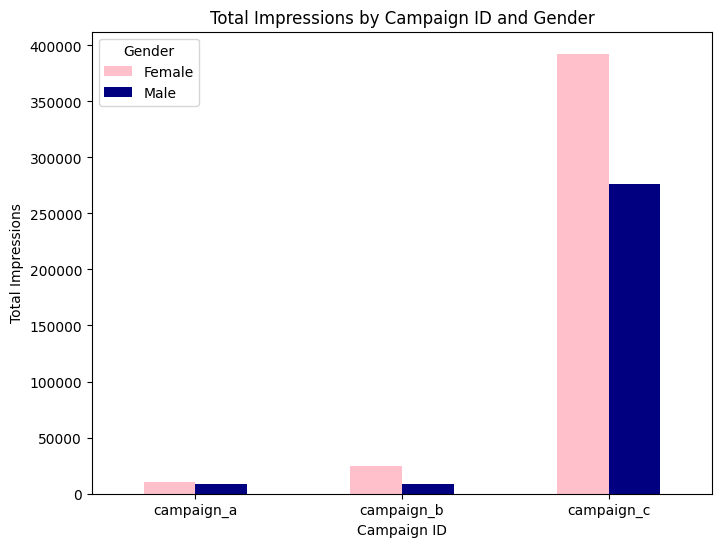

In [54]:
pivot_df = impressions_by_gender_campaign.unstack(level='gender')
pivot_df.columns = ["Female", "Male"]

bar=pivot_df.plot(kind='bar', figsize=(8,6), color=['pink', 'navy'])

plt.title("Total Impressions by Campaign ID and Gender")
plt.xlabel("Campaign ID")
plt.ylabel("Total Impressions")
plt.legend(title="Gender")
plt.xticks(rotation=0)

plt.show()

Text(0.5, 1.0, 'Impressions distribution by gender - Male')

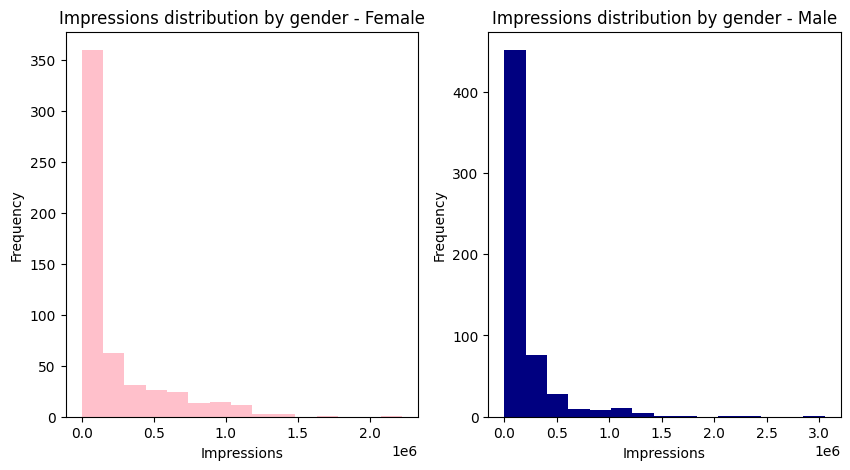

In [55]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(female_df["Impressions"],bins=15,color='pink')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.title("Impressions distribution by gender - Female")

plt.subplot(1,2,2)
plt.hist(male_df["Impressions"],bins=15,color='navy')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.title("Impressions distribution by gender - Male")

In [56]:
impressions_by_age_campaign = df.groupby(['xyz_campaign_id', 'age']).agg({'Impressions': 'mean'})
impressions_by_age_campaign

/tmp/ipython-input-3202383645.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  impressions_by_age_campaign = df.groupby(['xyz_campaign_id', 'age']).agg({'Impressions': 'mean'})


Impressions
xyz_campaign_id age                 
campaign_a      30-34    8885.241379
                35-39    6756.333333
                40-44   10329.500000
                45-49   11742.857143
campaign_b      30-34    8448.719388
                35-39   12490.730337
                40-44   16047.960000
                45-49   39970.826923
campaign_c      30-34  328753.223881
                35-39  278312.197279
                40-44  297199.480620
                45-49  401984.405405

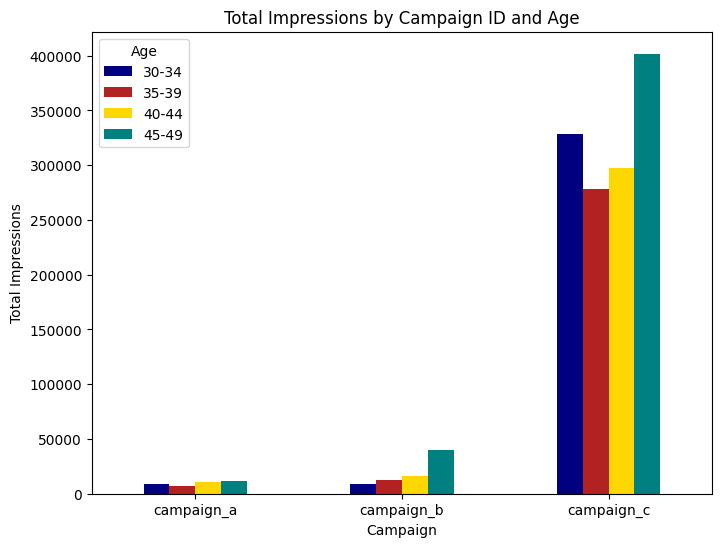

In [57]:
pivot_df = impressions_by_age_campaign.unstack(level='age')
pivot_df.columns = ["30-34", "35-39","40-44","45-49"]

pivot_df.plot(kind='bar', figsize=(8,6), color=['navy', 'firebrick', "gold", "teal"])

plt.title("Total Impressions by Campaign ID and Age")
plt.xlabel("Campaign")
plt.ylabel("Total Impressions")
plt.legend(title="Age")
plt.xticks(rotation=0)

plt.show()

📌 **Key takeaway:**
- Campaign_c attract most impressions (around 328,000 impressions per ads), followed by campaign_b (approximately 18,000 impresions per ad) and campaign_a (around 8,500 impressions per ad)
- Campaign b and c engage females rather than males. Campaign b attracted the right target audience, meanwhile campaign c targeted to males but impressions witnessed more in females.
- Regarding to age, all three caampaigns did not engage primary TA (30-34 years old) but engaging secondary TA (45-49 years old)

📍 **Recommendation:**
- Retargeting strategies, focusing more on females and people aged from 30-34 years old
- Reconsidering ad contents and deliverables to attract the right TA

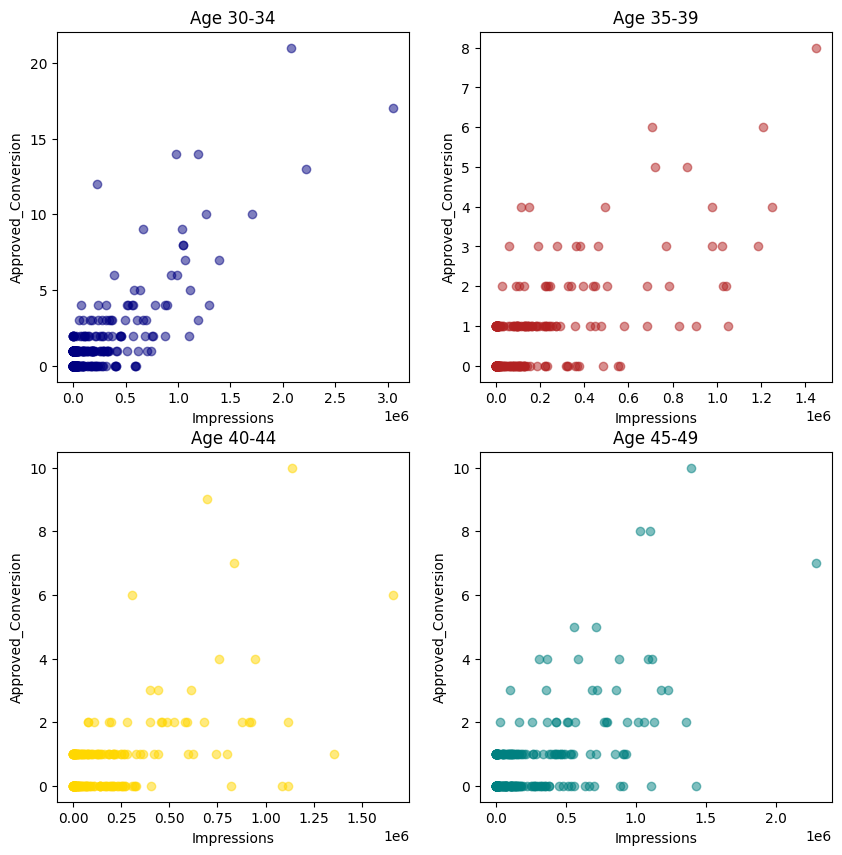

In [58]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(df_3034["Impressions"], df_3034["Approved_Conversion"], c="navy", alpha=0.5)
plt.xlabel('Impressions')
plt.ylabel('Approved_Conversion')
plt.title("Age 30-34")

plt.subplot(2,2,2)
plt.scatter(df_3539["Impressions"], df_3539["Approved_Conversion"], c="firebrick", alpha=0.5)
plt.xlabel('Impressions')
plt.ylabel('Approved_Conversion')
plt.title("Age 35-39")

plt.subplot(2,2,3)
plt.scatter(df_4044["Impressions"], df_4044["Approved_Conversion"], c="gold", alpha=0.5)
plt.xlabel('Impressions')
plt.ylabel('Approved_Conversion')
plt.title("Age 40-44")

plt.subplot(2,2,4)
plt.scatter(df_4549["Impressions"], df_4549["Approved_Conversion"], c="teal", alpha=0.5)
plt.xlabel('Impressions')
plt.ylabel('Approved_Conversion')
plt.title("Age 45-49")

plt.show()

📌 **Key takeaway:**
There are weak correlation between impressions and approved_conversions. As the impressions increase, no product bought.

### **Conversion metric**

#### Clicks

In [59]:
avg_clicks_cpn = df.groupby('xyz_campaign_id')['Clicks'].mean().reset_index().round(3)
avg_clicks_cpn

,xyz_campaign_id,Clicks
0,campaign_a,2.093
1,campaign_b,4.276
2,campaign_c,57.709


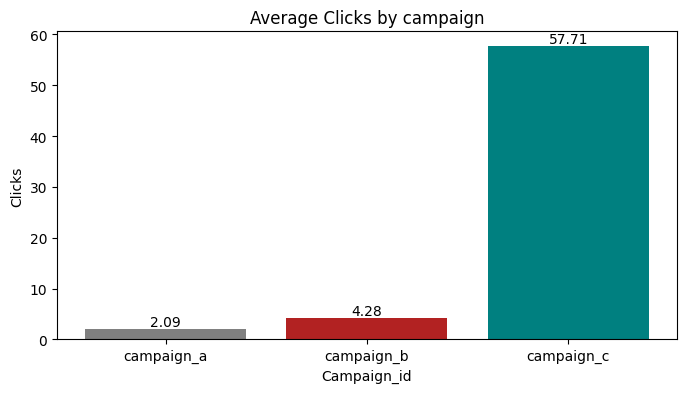

In [60]:
plt.figure(figsize=(8, 4))
bar = plt.bar(avg_clicks_cpn["xyz_campaign_id"], avg_clicks_cpn["Clicks"],color=['gray', 'firebrick', "teal"])
plt.title('Average Clicks by campaign')
plt.xlabel('Campaign_id')
plt.ylabel('Clicks')

for bar in bar:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

In [61]:
clicks_by_gender_campaign = df.groupby(['xyz_campaign_id', 'gender']).agg({'Clicks': 'mean'})
clicks_by_gender_campaign

/tmp/ipython-input-1113615582.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clicks_by_gender_campaign = df.groupby(['xyz_campaign_id', 'gender']).agg({'Clicks': 'mean'})


Clicks
xyz_campaign_id gender           
campaign_a      F        2.736842
                M        1.742857
campaign_b      F        6.378906
                M        1.687500
campaign_c      F       80.409420
                M       39.756447

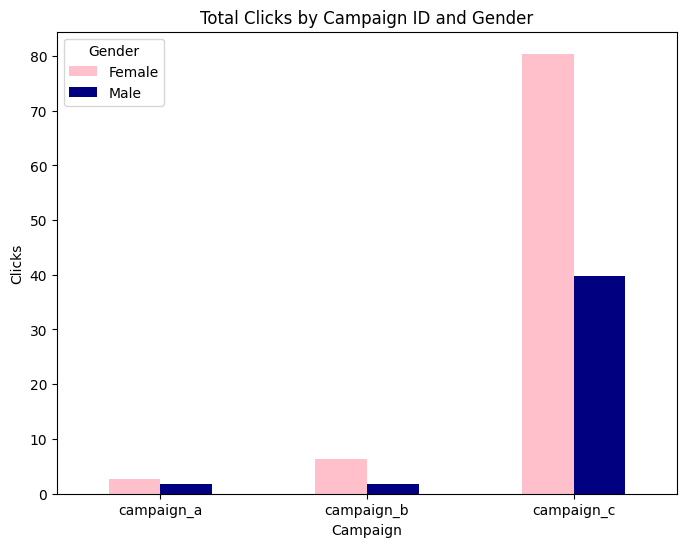

In [62]:
pivot_df = clicks_by_gender_campaign.unstack(level='gender')
pivot_df.columns = ["Female", "Male"]

pivot_df.plot(kind='bar', figsize=(8,6), color=['pink', 'navy'])

plt.title("Total Clicks by Campaign ID and Gender")
plt.xlabel("Campaign")
plt.ylabel("Clicks")
plt.legend(title="Gender")
plt.xticks(rotation=0)

plt.show()

📌 **Key takeaway:** Ads targeted to women in almost all campaigns made many more clicks than ads targeted to males. The pattern was particularly significant in campaign_c.

In [63]:
clicks_by_age_campaign = df.groupby(['xyz_campaign_id', 'age']).agg({'Clicks': 'mean'})
clicks_by_age_campaign

/tmp/ipython-input-1726657832.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clicks_by_age_campaign = df.groupby(['xyz_campaign_id', 'age']).agg({'Clicks': 'mean'})


Clicks
xyz_campaign_id age             
campaign_a      30-34   1.965517
                35-39   1.416667
                40-44   2.333333
                45-49   3.571429
campaign_b      30-34   1.459184
                35-39   3.089888
                40-44   4.146667
                45-49  10.692308
campaign_c      30-34  45.472637
                35-39  46.272109
                40-44  57.449612
                45-49  85.912162

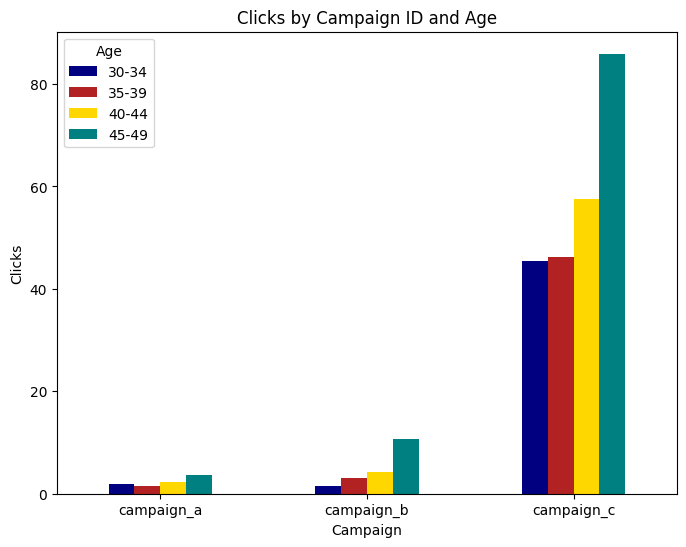

In [64]:
pivot_df = clicks_by_age_campaign.unstack(level='age')
pivot_df.columns = ["30-34", "35-39","40-44","45-49"]

pivot_df.plot(kind='bar', figsize=(8,6), color=['navy', 'firebrick', "gold", "teal"])

plt.title("Clicks by Campaign ID and Age")
plt.xlabel("Campaign")
plt.ylabel("Clicks")
plt.legend(title="Age")
plt.xticks(rotation=0)

plt.show()

📌 **Key takeaway:** Number of clicks from ads targeted to 45-49 year olds exceed other groups. Meanwhile targeted age group (30-34 years old) had the lowest click numbers.

**PROBLEM:** The company failed to attract clicks from the target audience group.

**POSSIBLE REASONS:**
- poor targeting, irrelevant or uncompelling messages
- lack of Call-to-Action (CTA)
- ineffective keyword selection
- bidding strategies not attractive enough to generate many clicks.

Let's check the spending on each group

In [65]:
spent_by_age_campaign = df.groupby(['xyz_campaign_id', 'age']).agg({'Spent': 'mean'})
spent_by_age_campaign

/tmp/ipython-input-689641304.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spent_by_age_campaign = df.groupby(['xyz_campaign_id', 'age']).agg({'Spent': 'mean'})


Spent
xyz_campaign_id age              
campaign_a      30-34    2.597586
                35-39    1.970000
                40-44    2.801667
                45-49    4.847143
campaign_b      30-34    1.997143
                35-39    4.308202
                40-44    6.005333
                45-49   16.039423
campaign_c      30-34   73.560348
                35-39   72.825578
                40-44   86.221085
                45-49  128.707027

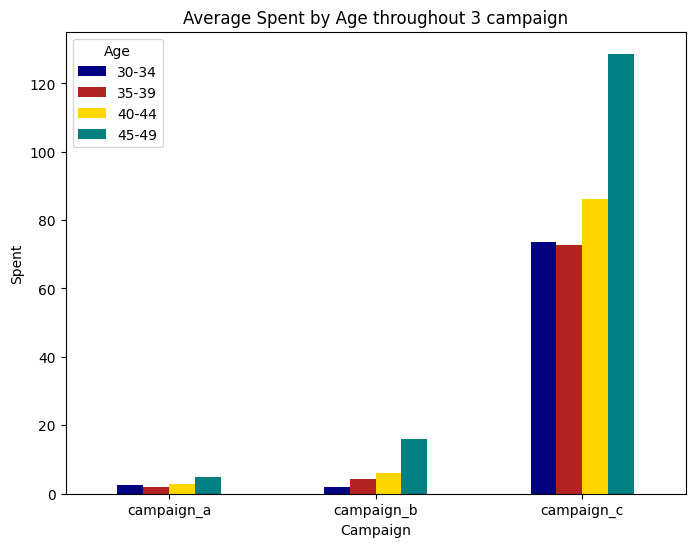

In [66]:
pivot_df = spent_by_age_campaign.unstack(level='age')
pivot_df.columns = ["30-34", "35-39","40-44","45-49"]

pivot_df.plot(kind='bar', figsize=(8,6), color=['navy', 'firebrick', "gold", "teal"])

plt.title("Average Spent by Age throughout 3 campaign")
plt.xlabel("Campaign")
plt.ylabel("Spent")
plt.legend(title="Age")
plt.xticks(rotation=0)

plt.show()

In [67]:
spent_by_gender_campaign=df.groupby(['xyz_campaign_id','gender']).agg({'Spent': 'mean'})
spent_by_gender_campaign

/tmp/ipython-input-3736392155.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spent_by_gender_campaign=df.groupby(['xyz_campaign_id','gender']).agg({'Spent': 'mean'})


Spent
xyz_campaign_id gender            
campaign_a      F         3.676316
                M         2.281714
campaign_b      F         9.298281
                M         2.466394
campaign_c      F       116.131920
                M        67.649685

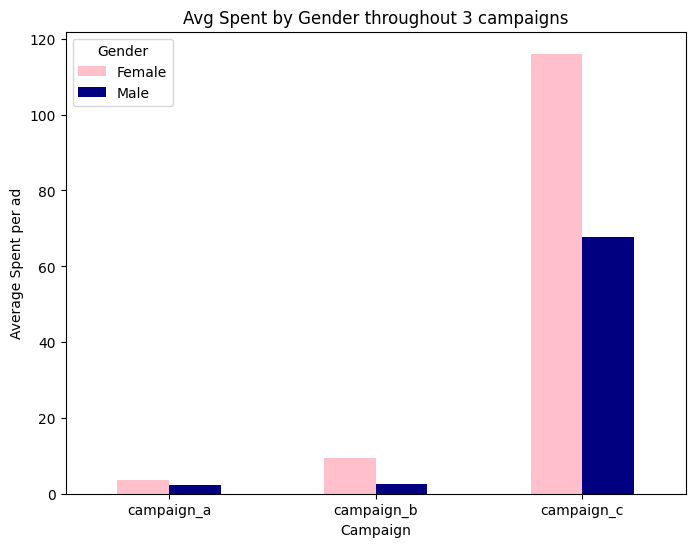

In [68]:
pivot_df = spent_by_gender_campaign.unstack(level='gender')
pivot_df.columns = ["Female", "Male"]

pivot_df.plot(kind='bar', figsize=(8,6), color=['pink', 'navy'])

plt.title("Avg Spent by Gender throughout 3 campaigns")
plt.xlabel("Campaign")
plt.ylabel("Average Spent per ad")
plt.legend(title="Gender")
plt.xticks(rotation=0)

plt.show()

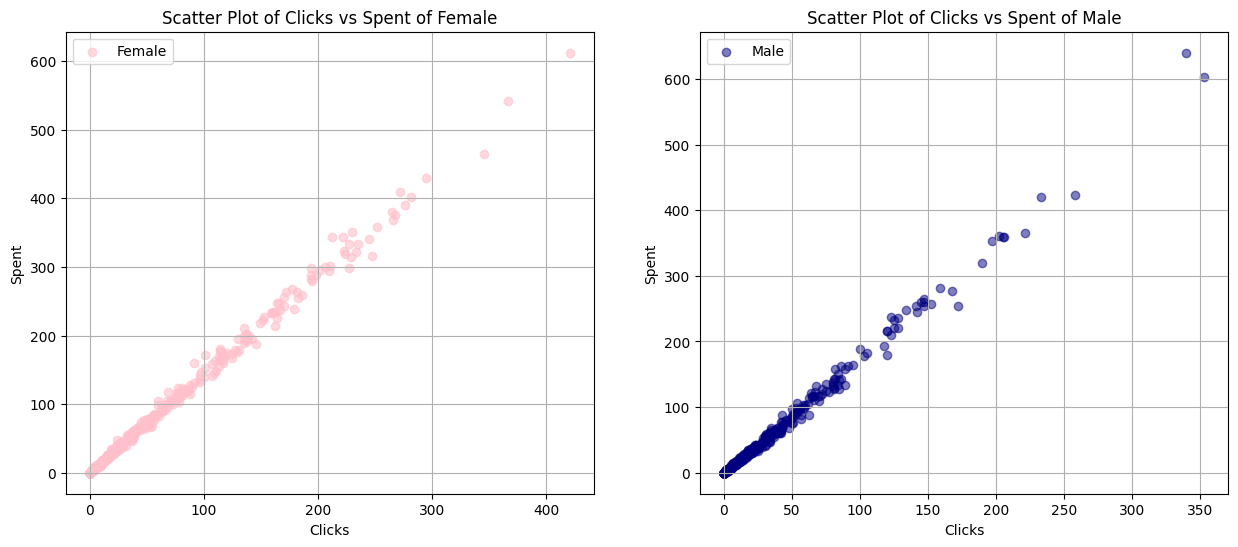

In [69]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.scatter(female_df["Clicks"], female_df["Spent"], c="pink", alpha=0.6, label="Female")
plt.xlabel('Clicks')
plt.ylabel('Spent')
plt.title("Scatter Plot of Clicks vs Spent of Female")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(male_df["Clicks"], male_df["Spent"], c="navy", alpha=0.5, label="Male")
plt.xlabel('Clicks')
plt.ylabel('Spent')
plt.title("Scatter Plot of Clicks vs Spent of Male")
plt.legend()
plt.grid(True)

plt.show()

/tmp/ipython-input-1754712928.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-1754712928.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-1754712928.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


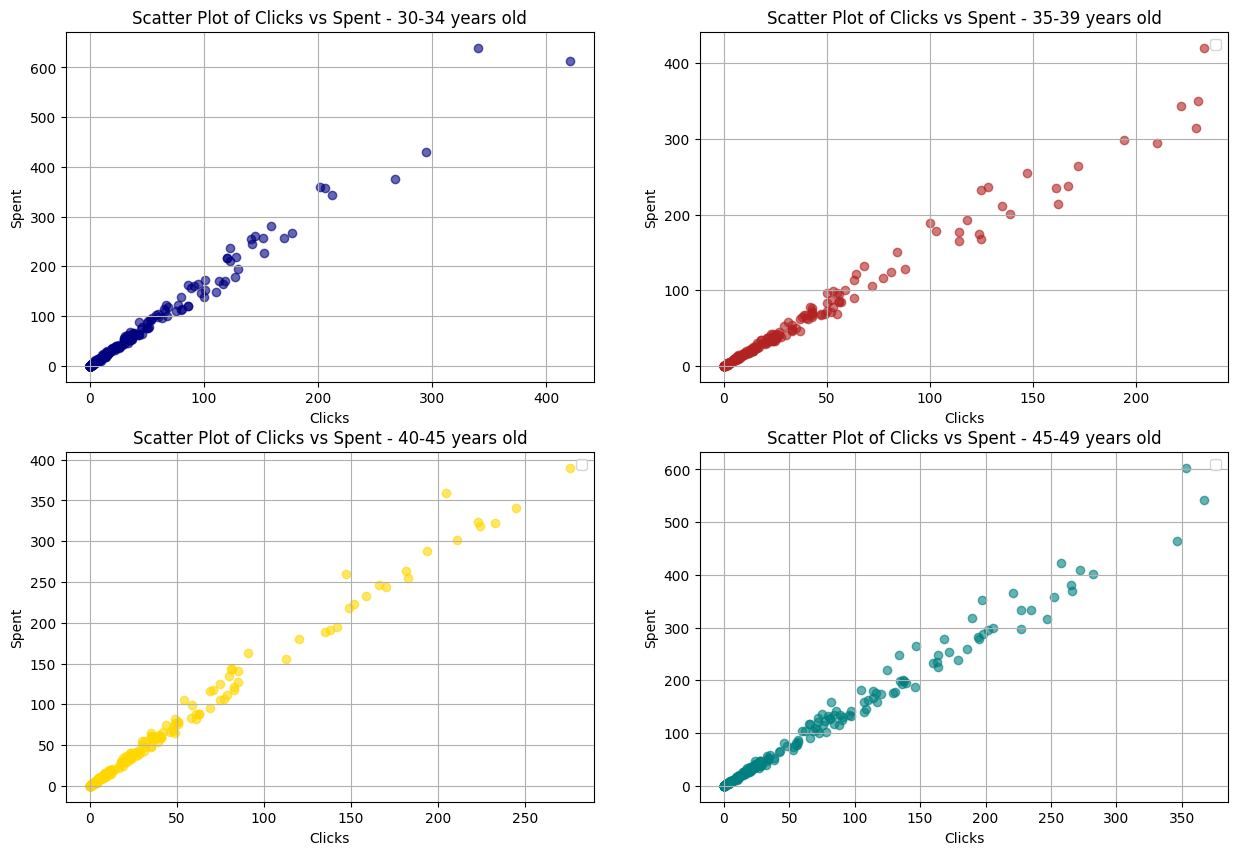

In [70]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.scatter(df_3034["Clicks"], df_3034["Spent"], c="navy", alpha=0.6)
plt.xlabel('Clicks')
plt.ylabel('Spent')
plt.title("Scatter Plot of Clicks vs Spent - 30-34 years old")
plt.grid(True)

plt.subplot(2,2,2)
plt.scatter(df_3539["Clicks"], df_3539["Spent"], c="firebrick", alpha=0.6)
plt.xlabel('Clicks')
plt.ylabel('Spent')
plt.title("Scatter Plot of Clicks vs Spent - 35-39 years old")
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
plt.scatter(df_4044["Clicks"], df_4044["Spent"], c="gold", alpha=0.6)
plt.xlabel('Clicks')
plt.ylabel('Spent')
plt.title("Scatter Plot of Clicks vs Spent - 40-45 years old")
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
plt.scatter(df_4549["Clicks"], df_4549["Spent"], c="teal", alpha=0.6)
plt.xlabel('Clicks')
plt.ylabel('Spent')
plt.title("Scatter Plot of Clicks vs Spent - 45-49 years old")
plt.legend()
plt.grid(True)


plt.show()

📌**Key takeaway:**
Spent and Clicks have strong correlation to each other. Company spent more money for ads targeted to women and people aged  45-49, contributing to low click in target audience.
> **Approve the assumptions that spending correlates with click numbers.**

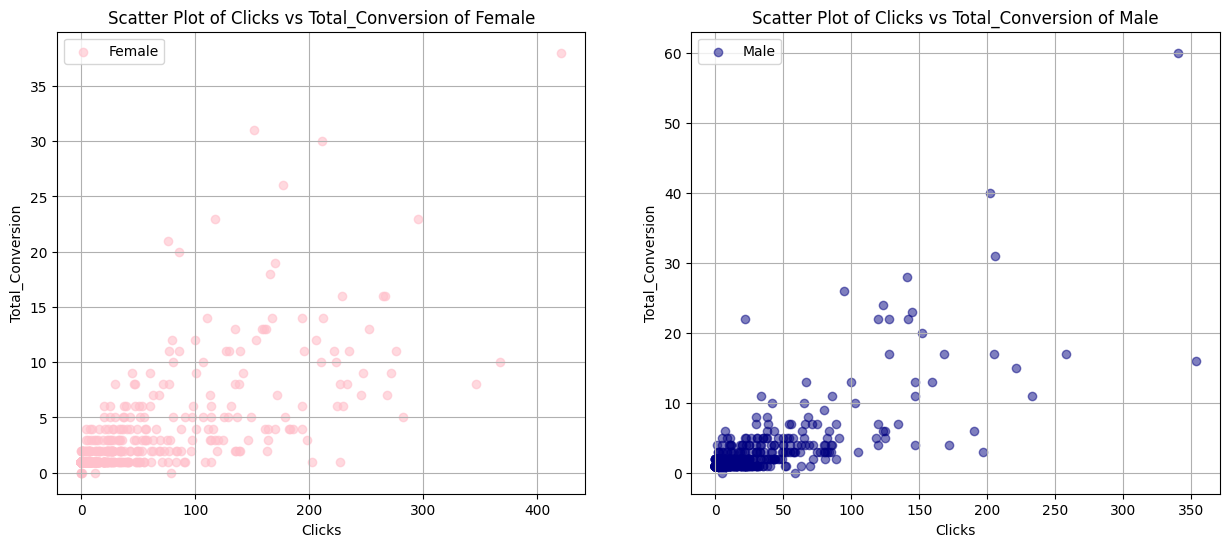

In [71]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.scatter(female_df["Clicks"], female_df["Total_Conversion"], c="pink", alpha=0.6, label="Female")
plt.xlabel('Clicks')
plt.ylabel('Total_Conversion')
plt.title("Scatter Plot of Clicks vs Total_Conversion of Female")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(male_df["Clicks"], male_df["Total_Conversion"], c="navy", alpha=0.5, label="Male")
plt.xlabel('Clicks')
plt.ylabel('Total_Conversion')
plt.title("Scatter Plot of Clicks vs Total_Conversion of Male")
plt.legend()
plt.grid(True)

plt.show()

📌 **Key takeaway:**
- Overall, there was moderated correlation between clicks and total_conversion.
- Women made clicks more than men.
- Men made less click but gain more conversion than women.

/tmp/ipython-input-3249096098.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-3249096098.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-3249096098.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


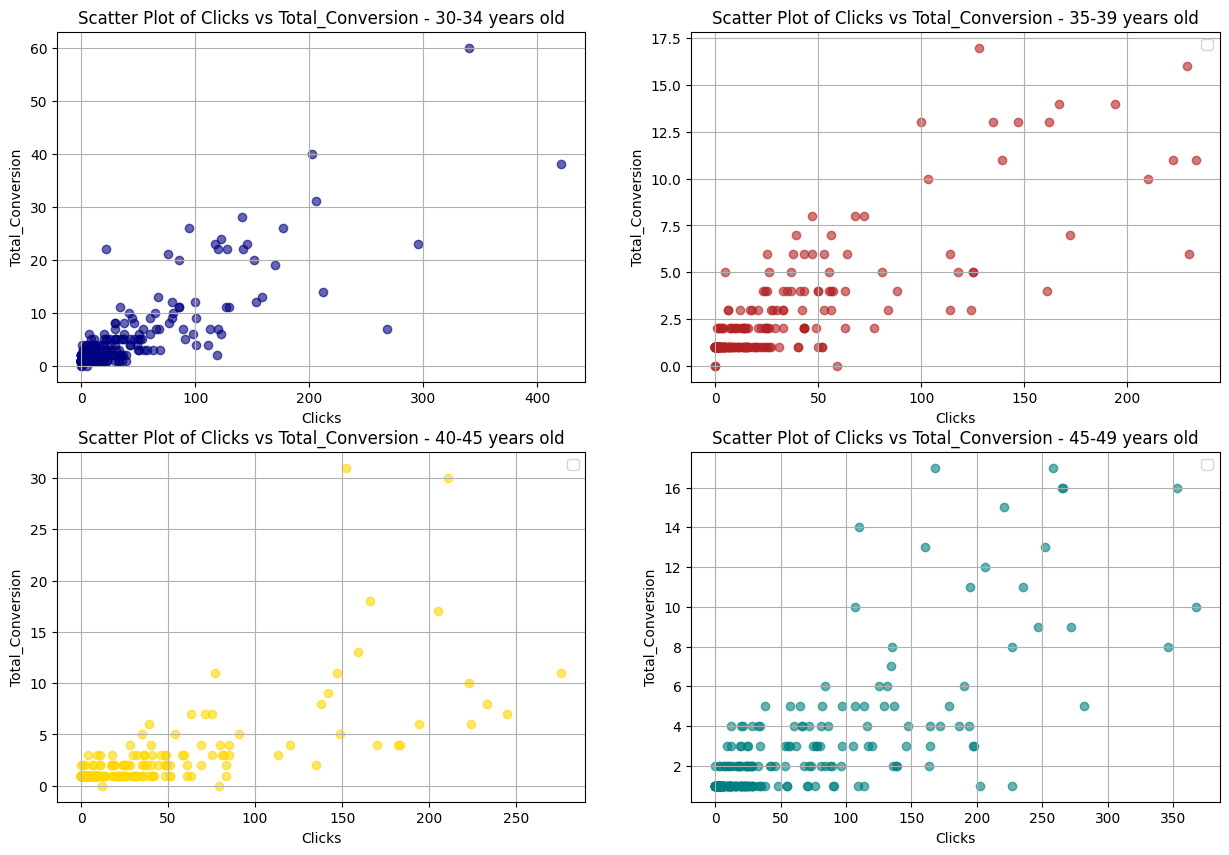

In [72]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.scatter(df_3034["Clicks"], df_3034["Total_Conversion"], c="navy", alpha=0.6)
plt.xlabel('Clicks')
plt.ylabel('Total_Conversion')
plt.title("Scatter Plot of Clicks vs Total_Conversion - 30-34 years old")
plt.grid(True)

plt.subplot(2,2,2)
plt.scatter(df_3539["Clicks"], df_3539["Total_Conversion"], c="firebrick", alpha=0.6)
plt.xlabel('Clicks')
plt.ylabel('Total_Conversion')
plt.title("Scatter Plot of Clicks vs Total_Conversion - 35-39 years old")
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
plt.scatter(df_4044["Clicks"], df_4044["Total_Conversion"], c="gold", alpha=0.6)
plt.xlabel('Clicks')
plt.ylabel('Total_Conversion')
plt.title("Scatter Plot of Clicks vs Total_Conversion - 40-45 years old")
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
plt.scatter(df_4549["Clicks"], df_4549["Total_Conversion"], c="teal", alpha=0.6)
plt.xlabel('Clicks')
plt.ylabel('Total_Conversion')
plt.title("Scatter Plot of Clicks vs Total_Conversion - 45-49 years old")
plt.legend()
plt.grid(True)


plt.show()

📌 **Key takeaway:**
- The correlation among clicks and total_conversion was seen clearly in age group 30-34.
- People in age group 30-34 has more tendency to buy product after clicking the ad.
- In other groups, as clicks increase, no conversion was made.

#### Average total conversion:

In [73]:
avg_total_conversion_cpn = df.groupby('xyz_campaign_id')['Total_Conversion'].mean().reset_index().round(3)
avg_total_conversion_cpn

,xyz_campaign_id,Total_Conversion
0,campaign_a,1.074
1,campaign_b,1.157
2,campaign_c,4.270


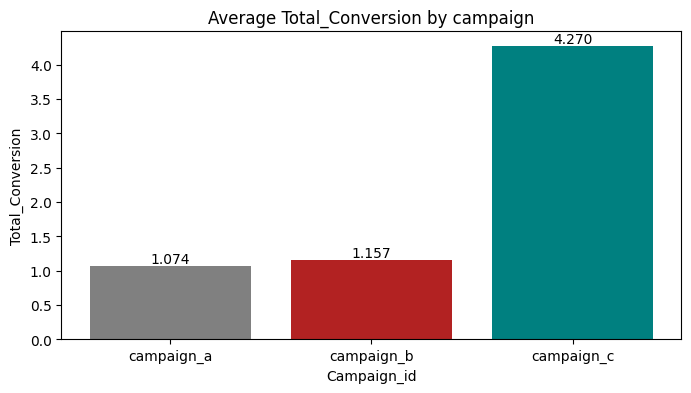

In [74]:
plt.figure(figsize=(8, 4))
bar = plt.bar(avg_total_conversion_cpn["xyz_campaign_id"], avg_total_conversion_cpn["Total_Conversion"], color=['gray', 'firebrick', "teal"])
plt.title('Average Total_Conversion by campaign')
plt.xlabel('Campaign_id')
plt.ylabel('Total_Conversion')

for bar in bar:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=10)

plt.show()

In [75]:
total_conversion_by_gender_campaign = df.groupby(['xyz_campaign_id', 'gender']).agg({'Total_Conversion': 'mean'})
total_conversion_by_gender_campaign

/tmp/ipython-input-1002840303.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_conversion_by_gender_campaign = df.groupby(['xyz_campaign_id', 'gender']).agg({'Total_Conversion': 'mean'})


Total_Conversion
xyz_campaign_id gender                  
campaign_a      F               1.052632
                M               1.085714
campaign_b      F               1.179688
                M               1.129808
campaign_c      F               4.789855
                M               3.859599

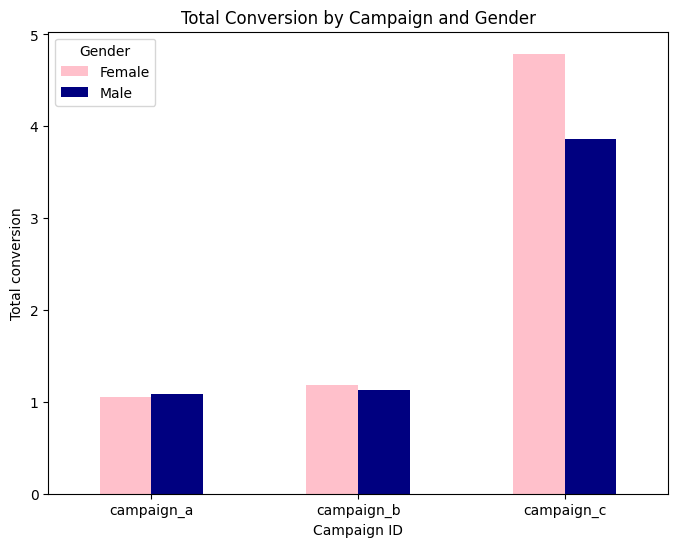

In [76]:
pivot_df = total_conversion_by_gender_campaign.unstack(level='gender')
pivot_df.columns = ["Female", "Male"]

pivot_df.plot(kind='bar', figsize=(8,6), color=['pink', 'navy'])

plt.title("Total Conversion by Campaign and Gender")
plt.xlabel("Campaign ID")
plt.ylabel("Total conversion")
plt.legend(title="Gender")
plt.xticks(rotation=0)

plt.show()

In [77]:
total_conversion_by_age_campaign = df.groupby(['xyz_campaign_id', 'age']).agg({'Total_Conversion': 'mean'})
total_conversion_by_age_campaign

/tmp/ipython-input-3280709421.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_conversion_by_age_campaign = df.groupby(['xyz_campaign_id', 'age']).agg({'Total_Conversion': 'mean'})


Total_Conversion
xyz_campaign_id age                    
campaign_a      30-34          1.068966
                35-39          1.083333
                40-44          1.166667
                45-49          1.000000
campaign_b      30-34          1.158163
                35-39          1.078652
                40-44          1.106667
                45-49          1.259615
campaign_c      30-34          5.835821
                35-39          3.517007
                40-44          3.356589
                45-49          3.689189

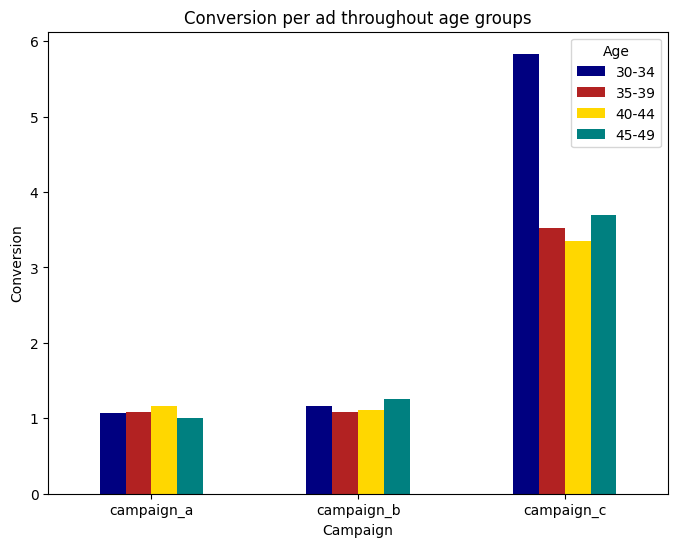

In [78]:
pivot_df = total_conversion_by_age_campaign.unstack(level='age')
pivot_df.columns = ["30-34", "35-39","40-44","45-49"]

pivot_df.plot(kind='bar', figsize=(8,6), color=['navy', 'firebrick', "gold", "teal"])

plt.title("Conversion per ad throughout age groups")
plt.xlabel("Campaign")
plt.ylabel("Conversion")
plt.legend(title="Age")
plt.xticks(rotation=0)

plt.show()

📌 **Key takeaway:**
- Campaign_c generated the highest conversions. But conversion witnessed most in females, suggesting ineffective targeting strategies when males were the TA of this campaign.  

- Despite fewer impressions and clicks, the 30–34 age group still led in high conversions, confirming campaign_c’s targeting effectiveness.

#### Approved_Conversion

In [79]:
avg_approved_conversion_cpn = df.groupby('xyz_campaign_id')['Approved_Conversion'].mean().reset_index().round(3)
avg_approved_conversion_cpn

,xyz_campaign_id,Approved_Conversion
0,campaign_a,0.444
1,campaign_b,0.394
2,campaign_c,1.395


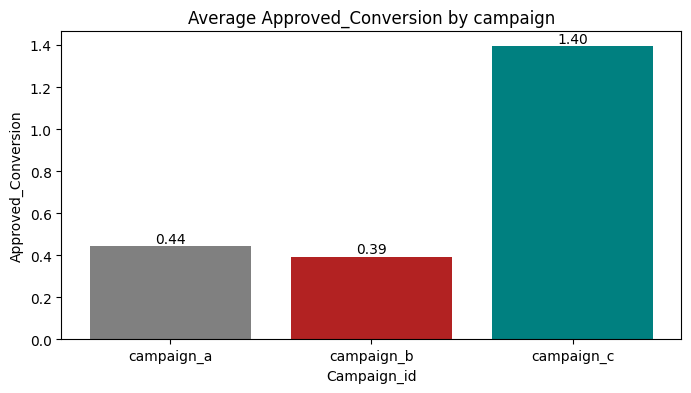

In [80]:
plt.figure(figsize=(8, 4))
bar=plt.bar(avg_approved_conversion_cpn["xyz_campaign_id"], avg_approved_conversion_cpn["Approved_Conversion"], color=['gray', 'firebrick', "teal"])
plt.title('Average Approved_Conversion by campaign')
plt.xlabel('Campaign_id')
plt.ylabel('Approved_Conversion')

for bar in bar:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

📌 **Key takeaway:**
- The approved conversion rate was relatively low (0.25–2.0), indicating a limited customer conversion overall.
- Despite having fewer ads, lower engagement, and smaller investment, Campaign A achieved higher conversions than Campaign B, demonstrating greater effectiveness.


In [81]:
approved_conversion_by_gender = df.groupby('gender')['Approved_Conversion'].mean().reset_index()
approved_conversion_by_gender

/tmp/ipython-input-3578166239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approved_conversion_by_gender = df.groupby('gender')['Approved_Conversion'].mean().reset_index()


,gender,Approved_Conversion
0,F,0.898367
1,M,0.986486


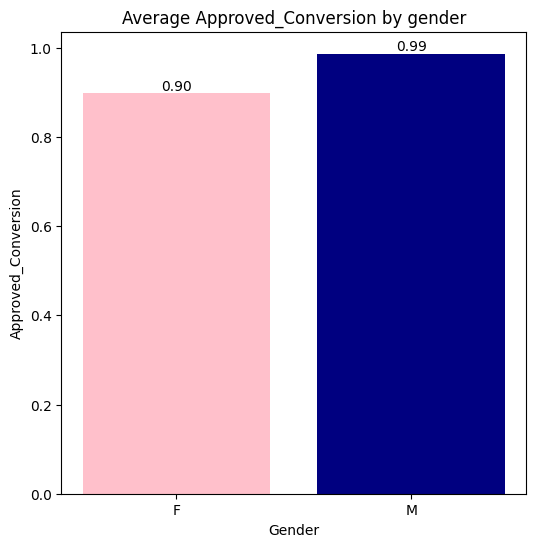

In [82]:
plt.figure(figsize=(6, 6))
bar = plt.bar(approved_conversion_by_gender["gender"], approved_conversion_by_gender["Approved_Conversion"], color=['pink','navy'])
plt.title('Average Approved_Conversion by gender')
plt.xlabel('Gender')
plt.ylabel('Approved_Conversion')
for bar in bar:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)


plt.show()

In [83]:
approved_conversion_by_gender_campaign = df.groupby(['xyz_campaign_id', 'gender']).agg({'Approved_Conversion': 'mean'})
approved_conversion_by_gender_campaign

/tmp/ipython-input-650084188.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approved_conversion_by_gender_campaign = df.groupby(['xyz_campaign_id', 'gender']).agg({'Approved_Conversion': 'mean'})


Approved_Conversion
xyz_campaign_id gender                     
campaign_a      F                  0.421053
                M                  0.457143
campaign_b      F                  0.375000
                M                  0.418269
campaign_c      F                  1.416667
                M                  1.378223

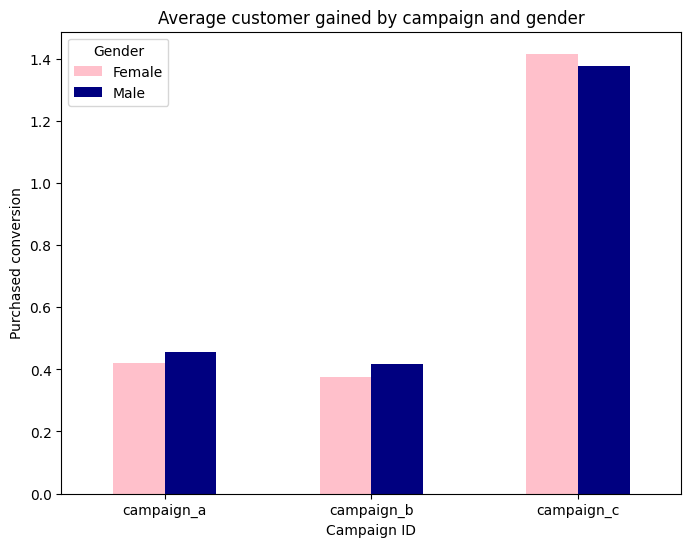

In [84]:
pivot_df = approved_conversion_by_gender_campaign.unstack(level='gender')
pivot_df.columns = ["Female", "Male"]

pivot_df.plot(kind='bar', figsize=(8,6), color=['pink', 'navy'])

plt.title("Average customer gained by campaign and gender")
plt.xlabel("Campaign ID")
plt.ylabel("Purchased conversion")
plt.legend(title="Gender")
plt.xticks(rotation=0)

plt.show()

📌 **Key takeaway:**
- Campaigns_a and b showed higher approved conversions among males, while campaign_c performed better with female audiences.

In [85]:
approved_conversion_by_age = df.groupby('age')['Approved_Conversion'].mean().reset_index()
approved_conversion_by_age

/tmp/ipython-input-1203214870.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approved_conversion_by_age = df.groupby('age')['Approved_Conversion'].mean().reset_index()


,age,Approved_Conversion
0,30-34,1.159624
1,35-39,0.834677
2,40-44,0.809524
3,45-49,0.803089


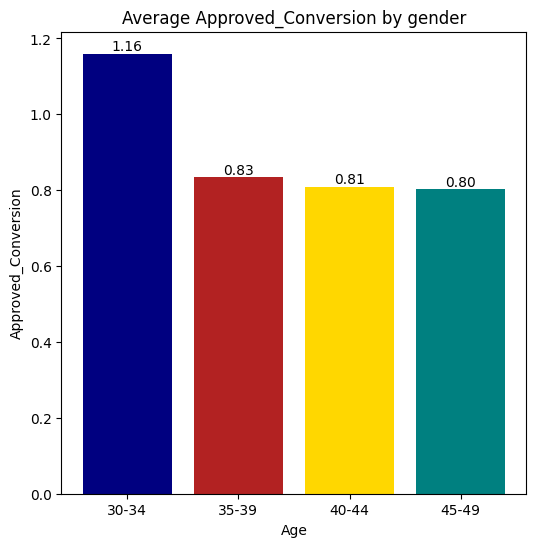

In [86]:
plt.figure(figsize=(6, 6))
bar = plt.bar(approved_conversion_by_age["age"], approved_conversion_by_age["Approved_Conversion"], color=['navy', 'firebrick', "gold", "teal"])
plt.title('Average Approved_Conversion by gender')
plt.xlabel('Age')
plt.ylabel('Approved_Conversion')
for bar in bar:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)


plt.show()

In [87]:
approved_conversion_by_age_campaign = df.groupby(['xyz_campaign_id', 'age']).agg({'Approved_Conversion': 'mean'})
approved_conversion_by_age_campaign

/tmp/ipython-input-1115770645.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approved_conversion_by_age_campaign = df.groupby(['xyz_campaign_id', 'age']).agg({'Approved_Conversion': 'mean'})


Approved_Conversion
xyz_campaign_id age                       
campaign_a      30-34             0.379310
                35-39             0.500000
                40-44             0.666667
                45-49             0.428571
campaign_b      30-34             0.448980
                35-39             0.382022
                40-44             0.333333
                45-49             0.346154
campaign_c      30-34             1.965174
                35-39             1.136054
                40-44             1.093023
                45-49             1.141892

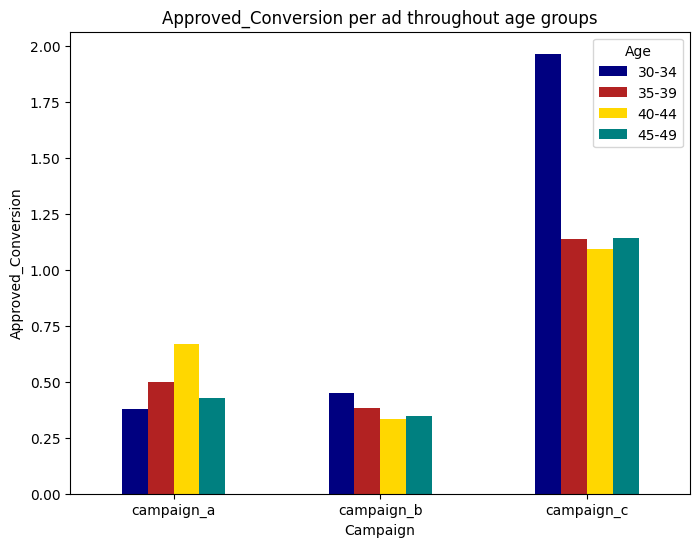

In [88]:
pivot_df = approved_conversion_by_age_campaign.unstack(level='age')
pivot_df.columns = ["30-34", "35-39","40-44","45-49"]

pivot_df.plot(kind='bar', figsize=(8,6), color=['navy', 'firebrick', "gold", "teal"])

plt.title("Approved_Conversion per ad throughout age groups")
plt.xlabel("Campaign")
plt.ylabel("Approved_Conversion")
plt.legend(title="Age")
plt.xticks(rotation=0)

plt.show()

📌 **Key takeaway:**
- Campaigns_b and c performed best with the 30–34 age group, aligning with their target audience.

- Campaign_a attracted more conversions from the 40–44 age group, suggesting an opportunity to focus further on this demographic.

### **Marketing spending**

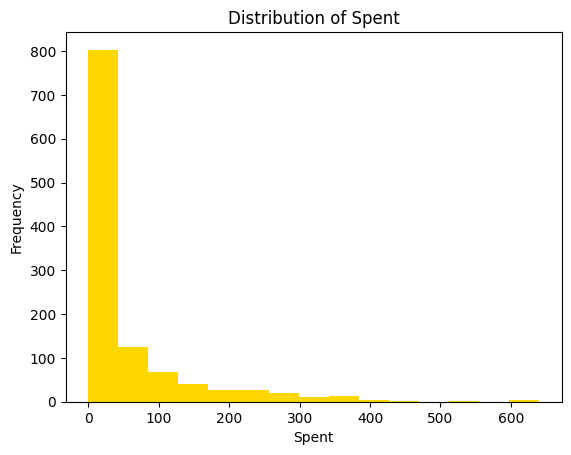

In [89]:
plt.hist(df["Spent"], bins=15, color='gold')
plt.xlabel('Spent')
plt.ylabel('Frequency')
plt.title("Distribution of Spent")
plt.show()

📌 **Key takeaway:**
- The distribution is heavily right-skewed.
- Most data points are concentrated near the lower end (close to 0–50), while a few campaigns have very high spending (up to 600+).
- This means that a small number of campaigns account for a large portion of total spending, while most campaigns operated with very low budgets.

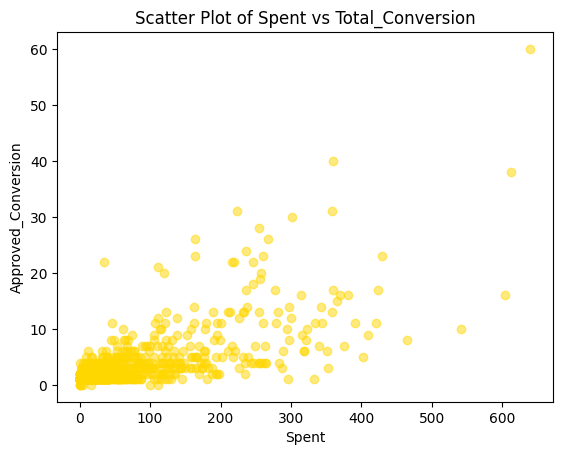

In [90]:
plt.scatter(df["Spent"], df["Total_Conversion"], c="gold", alpha=0.5, )
plt.xlabel('Spent')
plt.ylabel('Approved_Conversion')
plt.title("Scatter Plot of Spent vs Total_Conversion")
plt.show()

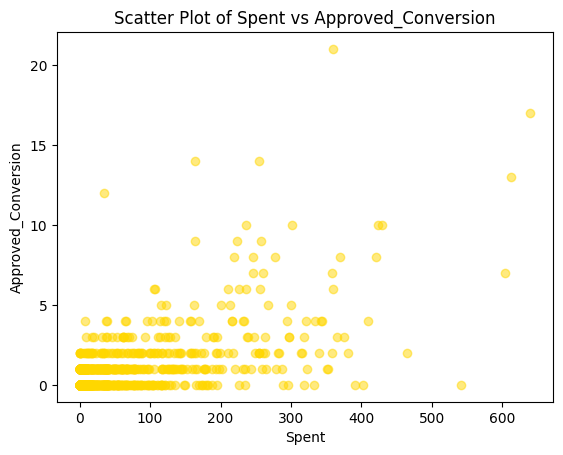

In [91]:
plt.scatter(df["Spent"], df["Approved_Conversion"], c="gold", alpha=0.5, )
plt.xlabel('Spent')
plt.ylabel('Approved_Conversion')
plt.title("Scatter Plot of Spent vs Approved_Conversion")
plt.show()

📌 **Key takeaway:**
There is very weak correlation between spent and approved_conversion. As the amount of money spent increases, no of product bought increases.

### **Calculated metrics**

- **Click-through-rate - CTR** ((Clicks / Impressions)*100): Shows how attractive the ad is. The higher CTR, the better ad relevant.
- **Cost per click - CPC** (Spent / Clicks): Cost efficiency per click
- **Cost per conversion** (Spent / Total_Conversion): Represents the average amount spent to generate one conversion. Lower values indicate higher efficiency in converting leads into customers.
- **Approved conversion rate** ((Approved_Conversion / Total_Conversion)*100): Percentage of total conversion that resulted final purchases.

In [92]:
df["CTR (%)"]=round(df["Clicks"]/df["Impressions"]*100,4)
df["CPC"] = round(df["Spent"]/df["Clicks"],4)
df["Cost_per_conversion"] = round(df["Spent"]/df["Total_Conversion"],4)
df["Approved_conversion_rate (%)"] = round(df["Approved_Conversion"]/df["Total_Conversion"]*100,2)
df.sample(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR (%),CPC,Cost_per_conversion,Approved_conversion_rate (%)
305,778161,campaign_b,115804,30-34,M,28,17954,6,7.540000,2,1,0.0334,1.2567,3.77,50.0
745,1121551,campaign_c,144615,40-44,M,36,196253,32,55.100000,1,0,0.0163,1.7219,55.10,0.0
414,782228,campaign_b,116517,40-44,F,63,12318,5,6.340000,1,1,0.0406,1.2680,6.34,100.0
655,1121352,campaign_c,144582,35-39,M,25,368986,59,100.289999,0,0,0.0160,1.6998,inf,NaN
412,782180,campaign_b,116509,30-34,M,29,3396,0,0.000000,1,0,0.0000,NaN,0.00,0.0


**Note:** NaN: 0/0; inf: 1/0

Text(0.5, 1.0, 'Approved conversion rate distribution')

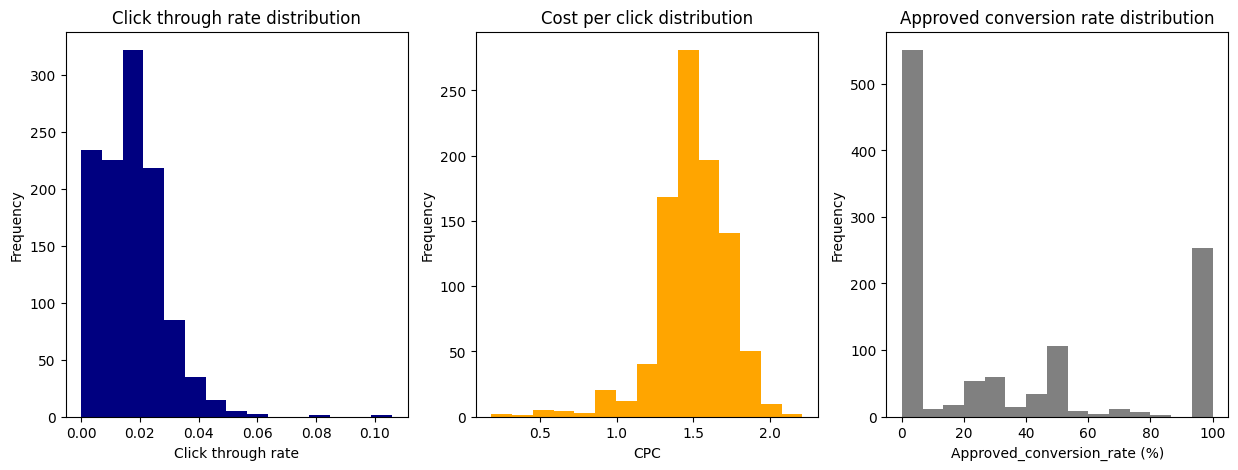

In [93]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(df['CTR (%)'],bins=15,color='navy')
plt.xlabel('Click through rate')
plt.ylabel('Frequency')
plt.title('Click through rate distribution')

plt.subplot(1,3,2)
plt.hist(df['CPC'],bins=15,color='orange')
plt.xlabel('CPC')
plt.ylabel('Frequency')
plt.title('Cost per click distribution')

plt.subplot(1,3,3)
plt.hist(df['Approved_conversion_rate (%)'],bins=15,color='gray')
plt.xlabel('Approved_conversion_rate (%)')
plt.ylabel('Frequency')
plt.title('Approved conversion rate distribution')

In [94]:
CTR_by_cpn = df.groupby('xyz_campaign_id')['CTR (%)'].mean().reset_index().round(3)
CTR_by_cpn

,xyz_campaign_id,CTR (%)
0,campaign_a,0.018
1,campaign_b,0.017
2,campaign_c,0.016


In [95]:
Cost_per_conversion_by_cpn = df.groupby('xyz_campaign_id')['Cost_per_conversion'].median().reset_index().round(3)
Cost_per_conversion_by_cpn

,xyz_campaign_id,Cost_per_conversion
0,campaign_a,1.280
1,campaign_b,1.380
2,campaign_c,17.892


In [96]:
CPC_by_cpn = df.groupby('xyz_campaign_id')['CPC'].mean().reset_index().round(3)
CPC_by_cpn

,xyz_campaign_id,CPC
0,campaign_a,1.330
1,campaign_b,1.364
2,campaign_c,1.572


In [97]:
Approved_conversion_rate = df.groupby('xyz_campaign_id')['Approved_conversion_rate (%)'].mean().reset_index().round(3)
Approved_conversion_rate

,xyz_campaign_id,Approved_conversion_rate (%)
0,campaign_a,41.667
1,campaign_b,34.736
2,campaign_c,32.620


In [98]:
merged_df = pd.merge(total_ad_by_campaign, avg_spent_cpn, on='xyz_campaign_id')
merged_df = pd.merge(merged_df, avg_Impressions_cpn, on='xyz_campaign_id')
merged_df = pd.merge(merged_df, avg_clicks_cpn, on='xyz_campaign_id')
merged_df = pd.merge(merged_df, avg_total_conversion_cpn, on='xyz_campaign_id')
merged_df = pd.merge(merged_df, avg_approved_conversion_cpn, on='xyz_campaign_id')
merged_df = pd.merge(merged_df, CTR_by_cpn, on='xyz_campaign_id')
merged_df = pd.merge(merged_df, CPC_by_cpn, on='xyz_campaign_id')
merged_df = pd.merge(merged_df, Cost_per_conversion_by_cpn, on='xyz_campaign_id')
merged_df = pd.merge(merged_df, Approved_conversion_rate, on='xyz_campaign_id')
# View the final merged table
merged_df

,xyz_campaign_id,ad_id,Spent,Impressions,Clicks,Total_Conversion,Approved_Conversion,CTR (%),CPC,Cost_per_conversion,Approved_conversion_rate (%)
0,campaign_a,54,149.71,8943.056,2.093,1.074,0.444,0.018,1.330,1.280,41.667
1,campaign_b,464,2893.37,17517.644,4.276,1.157,0.394,0.017,1.364,1.380,34.736
2,campaign_c,625,55662.15,327717.946,57.709,4.270,1.395,0.016,1.572,17.892,32.620


📌 **Key takeaway:**
- Campaign_c achieved the highest overall performance (impressions, clicks, conversions) due to its larger budget and traffic, followed by Campaign_b.
- Campaign_a outperformed Campaign_b in approved conversions (0.44 vs. 0.39) despite much smaller traffic.
- Although CTRs were very low (~0.016–0.018%), Campaign_a recorded the highest CTR (0.018), indicating stronger ad relevance.
- Campaign_a also demonstrated the best cost and performance efficiency (Cost per Conversion: 1.28; CPC: 1.33; Approved Conversion Rate: 41.67%), confirming its niche targeting strategy, a low-budget campaign that effectively reached a small, high-quality audience.

#### **Campaign_c performance evaluation**

In [99]:
cpn_c_df=df[df["xyz_campaign_id"]=="campaign_c"]
cpn_c_df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR (%),CPC,Cost_per_conversion,Approved_conversion_rate (%)
518,1121091,campaign_c,144531,30-34,M,10,1194718,141,254.049996,28,14,0.0118,1.8018,9.0732,50.00
519,1121092,campaign_c,144531,30-34,M,10,637648,67,122.400000,13,5,0.0105,1.8269,9.4154,38.46
520,1121094,campaign_c,144531,30-34,M,10,24362,0,0.000000,1,1,0.0000,NaN,0.0000,100.00
521,1121095,campaign_c,144531,30-34,M,10,459690,50,86.330001,5,2,0.0109,1.7266,17.2660,40.00
522,1121096,campaign_c,144531,30-34,M,10,750060,86,161.909999,11,2,0.0115,1.8827,14.7191,18.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,campaign_c,179977,45-49,F,109,1129773,252,358.189997,13,2,0.0223,1.4214,27.5531,15.38
1139,1314411,campaign_c,179978,45-49,F,110,637549,120,173.880003,3,0,0.0188,1.4490,57.9600,0.00
1140,1314412,campaign_c,179979,45-49,F,111,151531,28,40.289999,2,0,0.0185,1.4389,20.1450,0.00
1141,1314414,campaign_c,179981,45-49,F,113,790253,135,198.710001,8,2,0.0171,1.4719,24.8388,25.00


In [100]:
fb_campaign_cpn_c=cpn_c_df.groupby(["fb_campaign_id"]).agg({
    'ad_id': 'count',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spent': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum'
}).reset_index()

fb_campaign_cpn_c.rename(columns={'ad_id':'ad_count'},inplace=True)
fb_campaign_cpn_c.describe()

,fb_campaign_id,ad_count,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,277.000000,277.000000,2.770000e+02,277.000000,277.000000,277.000000,277.000000
mean,156742.332130,2.256318,7.394358e+05,130.209386,200.946390,9.635379,3.148014
std,16780.296762,1.475404,9.366581e+05,168.944698,260.446202,12.525362,4.806748
min,144531.000000,1.000000,6.838000e+03,0.000000,0.000000,1.000000,0.000000
25%,144618.000000,1.000000,1.385250e+05,22.000000,32.090000,2.000000,1.000000
50%,144694.000000,2.000000,4.029750e+05,65.000000,105.219997,5.000000,2.000000
75%,179899.000000,3.000000,8.775350e+05,167.000000,247.350001,12.000000,4.000000
max,179982.000000,6.000000,5.528364e+06,904.000000,1425.450004,94.000000,37.000000


Let's find out top 5 fb_campaign_id that have the highest total_conversion and and compare their performance against the average.

In [101]:
avg_total_conversion=fb_campaign_cpn_c["Total_Conversion"].mean()
fb_campaign_cpn_c["% Higher than average"]=round(fb_campaign_cpn_c["Total_Conversion"]/avg_total_conversion*100,2)
fb_campaign_cpn_c[["fb_campaign_id","Total_Conversion","% Higher than average"]].sort_values(by="Total_Conversion",ascending=False).head(5)

,fb_campaign_id,Total_Conversion,% Higher than average
1,144532,94,975.57
2,144533,73,757.62
14,144554,66,684.98
108,144659,63,653.84
0,144531,58,601.95


📌 **Key takeaway:**
- Facebook campaign id 144532, 144533, 144554, 144659, 144531 are campaigns that gain the highest total conversion (aroun 60-95 conversions), exceeding the average point 600%-1000%.

**Recommendations:**
- The company should analyze the creative content, audience targeting, and deliverables of these high-performing campaigns and adapt their successful elements in future campaigns to enhance overall performance.

## **CORRELATION**

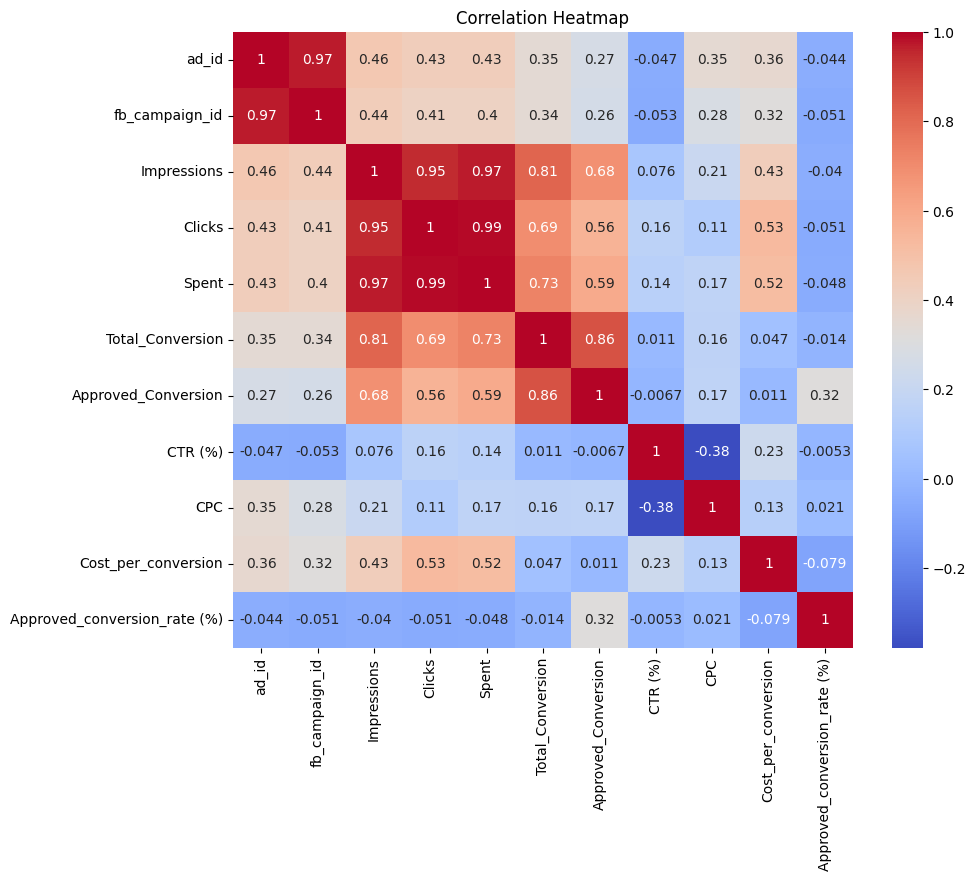

In [102]:
numeric_col=df.select_dtypes(include=np.number).columns.tolist()
num_df=df[numeric_col]
correlation = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

📌 **Key takeaway:**

**Strong positive correlation:**
- Impressions, Clicks, and Spent are strongly correlated with each other (~ 0.95–0.99). This means they carry almost the same information, including all of them would cause multicollinearity.
- Total_Conversion vs Impressions (0.81). More impressions generally drive more conversions, reflecting effective exposure.
- Total_Conversion vs Spent (0.73). Ads with higher spending tend to generate more conversion.

**Moderate positive correlation:**
- Total_Conversion vs Clicks (0.69). Ads with higher click numbers lead to more conversion.

**Moderate negative correlation:**
- CPC vs CTR (%) (0.38). This figure can be explained that higher cost per clicks would lead to lower click-through-rate.

## **Data Modeling**

### Data Processing


In [103]:
one_hot_encoded_df = pd.get_dummies(df, columns=["gender","age"])
one_hot_encoded_df.sample(5)

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR (%),CPC,Cost_per_conversion,Approved_conversion_rate (%),gender_F,gender_M,age_30-34,age_35-39,age_40-44,age_45-49
16,709115,campaign_a,103978,30,2305,1,0.570000,1,0,0.0434,0.5700,0.57,0.0,False,True,True,False,False,False
87,734901,campaign_b,108770,64,1554,0,0.000000,1,0,0.0000,NaN,0.00,0.0,True,False,True,False,False,False
801,1121671,campaign_c,144635,28,139406,24,39.049999,1,0,0.0172,1.6271,39.05,0.0,False,True,False,False,False,True
427,782815,campaign_b,116615,10,11537,3,4.300000,1,0,0.0260,1.4333,4.30,0.0,True,False,False,False,True,False
354,780199,campaign_b,116163,23,1030,0,0.000000,1,1,0.0000,NaN,0.00,100.0,True,False,False,True,False,False


### **Processing Data**

I will extract 99% of the input to remove the most significant values that can otherwise influence the reliability of the model.

In [104]:
Impressions_q99=df["Impressions"].quantile(0.99)
Clicks_q99=df["Clicks"].quantile(0.99)
Spent_q99=df["Spent"].quantile(0.99)
Total_Conversion_q99=df["Total_Conversion"].quantile(0.99)
Approved_Conversion_q99=df["Approved_Conversion"].quantile(0.99)

In [105]:
con1=df["Impressions"]<=Impressions_q99
con2=df["Clicks"]<=Clicks_q99
con3=df["Spent"]<=Spent_q99
con4=df["Total_Conversion"]<=Total_Conversion_q99
con5=df["Approved_Conversion"]<=Approved_Conversion_q99

In [106]:
new_df=df[con1 & con2 & con3 & con4 & con5]
new_df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR (%),CPC,Cost_per_conversion,Approved_conversion_rate (%)
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.430000,2,1,0.0136,1.4300,0.7150,50.00
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.820000,2,0,0.0112,0.9100,0.9100,0.00
2,708771,campaign_a,103920,30-34,M,20,693,0,0.000000,1,0,0.0000,NaN,0.0000,0.00
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.250000,1,0,0.0235,1.2500,1.2500,0.00
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.290000,1,1,0.0242,1.2900,1.2900,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,campaign_c,179977,45-49,F,109,1129773,252,358.189997,13,2,0.0223,1.4214,27.5531,15.38
1139,1314411,campaign_c,179978,45-49,F,110,637549,120,173.880003,3,0,0.0188,1.4490,57.9600,0.00
1140,1314412,campaign_c,179979,45-49,F,111,151531,28,40.289999,2,0,0.0185,1.4389,20.1450,0.00
1141,1314414,campaign_c,179981,45-49,F,113,790253,135,198.710001,8,2,0.0171,1.4719,24.8388,25.00


In [107]:
new_df.describe()

,ad_id,fb_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR (%),CPC,Cost_per_conversion,Approved_conversion_rate (%)
count,1.118000e+03,1118.000000,1.118000e+03,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,911.000000,1115.0000,1110.000000
mean,9.837383e+05,133446.575134,1.599254e+05,28.771020,44.149195,2.443649,0.792487,0.016387,1.497101,inf,33.898450
std,1.944731e+05,20530.692749,2.455960e+05,46.397212,70.209959,3.051916,1.169539,0.011599,0.233901,NaN,40.503106
min,7.087460e+05,103916.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.180000,0.0000,0.000000
25%,7.774010e+05,115677.500000,6.203000e+03,1.000000,1.440000,1.000000,0.000000,0.009900,1.389300,1.3800,0.000000
50%,1.121172e+06,144547.000000,4.680750e+04,7.000000,11.085000,1.000000,1.000000,0.015900,1.498100,8.0512,12.500000
75%,1.121783e+06,144654.000000,1.984365e+05,34.000000,54.205000,3.000000,1.000000,0.023375,1.639150,21.2293,60.000000
max,1.314415e+06,179982.000000,1.296189e+06,252.000000,365.660001,23.000000,9.000000,0.105900,2.212000,inf,100.000000


In [108]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1118 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ad_id                         1118 non-null   int64   
 1   xyz_campaign_id               1118 non-null   object  
 2   fb_campaign_id                1118 non-null   int64   
 3   age                           1118 non-null   category
 4   gender                        1118 non-null   category
 5   interest                      1118 non-null   category
 6   Impressions                   1118 non-null   int64   
 7   Clicks                        1118 non-null   int64   
 8   Spent                         1118 non-null   float64 
 9   Total_Conversion              1118 non-null   int64   
 10  Approved_Conversion           1118 non-null   int64   
 11  CTR (%)                       1118 non-null   float64 
 12  CPC                           911 non-null    float64

In [109]:
one_hot_encoded_df = pd.get_dummies(new_df, columns=["gender","age"])
one_hot_encoded_df.sample()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR (%),CPC,Cost_per_conversion,Approved_conversion_rate (%),gender_F,gender_M,age_30-34,age_35-39,age_40-44,age_45-49
686,1121413,campaign_c,144592,64,65060,7,14.52,1,1,0.0108,2.0743,14.52,100.0,False,True,False,True,False,False


### Data Modeling: Linear Regression

In [110]:
X = one_hot_encoded_df[["Spent","Clicks","age_30-34","age_35-39","age_40-44","age_45-49","gender_F","gender_M"]]
y = one_hot_encoded_df["Total_Conversion"]

X = sm.add_constant(X)

model = sm.OLS(y, X.astype('float')).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total_Conversion   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 07 Oct 2025   Prob (F-statistic):          1.09e-185
Time:                        15:43:43   Log-Likelihood:                -2393.9
No. Observations:                1118   AIC:                             4802.
Df Residuals:                    1111   BIC:                             4837.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4962      0.044     11.252      0.0

### Split Train, Test Data

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape: ", X_train.shape, y_train.shape)
print("Testing set shape: ", X_test.shape, y_test.shape)

Training set shape:  (894, 9) (894,)
Testing set shape:  (224, 9) (224,)


In [112]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train.astype('float')).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total_Conversion   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     162.3
Date:                Tue, 07 Oct 2025   Prob (F-statistic):          5.32e-139
Time:                        15:43:43   Log-Likelihood:                -1943.4
No. Observations:                 894   AIC:                             3901.
Df Residuals:                     887   BIC:                             3934.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4838      0.051      9.421      0.0

 📌 **Model Interpretation:**
- R-squared: 0.523. Meaning that the independent variable explains 52.3% (around 467 values) of the dependent variable. Since this dataset influenced most on people behavior where many factors influence the outcome, this R2 score can be considered a good model.
- Adj. R-squared: 0.52. Meaning that after adjusting for predictors, the model still performs well.
- p-value (constant, Spent, Clicks, age_30-34, age_45-49, gender_F, geder_M): < 0.05. Meaning these variables are statistically significant.
- p-value (age_45-49, age_40-44): > 0.05. This means that variables are not statistically significant.

#### Model Evaluation:

In [113]:
y_pred = model.predict(X_test)
y_pred.shape

(224,)

In [114]:
import numpy as np

# Evaluate the model
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)

print('mse:', mse)
print('rmse:', rmse)

mse: 3.1371935166547464
rmse: 1.7712124425530513


In [115]:
one_hot_encoded_df.describe()

,ad_id,fb_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR (%),CPC,Cost_per_conversion,Approved_conversion_rate (%)
count,1.118000e+03,1118.000000,1.118000e+03,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,911.000000,1115.0000,1110.000000
mean,9.837383e+05,133446.575134,1.599254e+05,28.771020,44.149195,2.443649,0.792487,0.016387,1.497101,inf,33.898450
std,1.944731e+05,20530.692749,2.455960e+05,46.397212,70.209959,3.051916,1.169539,0.011599,0.233901,NaN,40.503106
min,7.087460e+05,103916.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.180000,0.0000,0.000000
25%,7.774010e+05,115677.500000,6.203000e+03,1.000000,1.440000,1.000000,0.000000,0.009900,1.389300,1.3800,0.000000
50%,1.121172e+06,144547.000000,4.680750e+04,7.000000,11.085000,1.000000,1.000000,0.015900,1.498100,8.0512,12.500000
75%,1.121783e+06,144654.000000,1.984365e+05,34.000000,54.205000,3.000000,1.000000,0.023375,1.639150,21.2293,60.000000
max,1.314415e+06,179982.000000,1.296189e+06,252.000000,365.660001,23.000000,9.000000,0.105900,2.212000,inf,100.000000


📌 **Model Evaluation:**
1. **Comparison to the Mean:**
- The mean of Clicks is $28.77$. The RMSE of $1.77$ is about $6.2\%$ of the mean\
This indicates that the average error in the model's predictions is about $6.2\%$ of the average value in the dataset.

- The mean of Spent is $44.15$. The RMSE of $1.77$ is about $4\%$ of the mean\
This indicates that the average error in the model's predictions is about $4\%$ of the average value in the dataset.


2. **Comparison to the Standard Deviation:**
-  The standard deviation of Clicks is $46.4$. The RMSE is about $3.8\%$ of the standard deviation.
- The standard deviation of Spent is $70.2$. The RMSE is about $2.5\%$ of the standard deviation.\
This suggests that the RMSE is relatively small compared to the variability of the data, indicating good model performance.

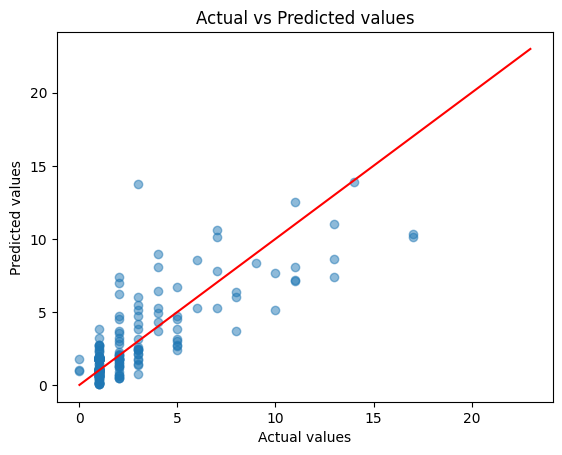

In [116]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()], color = "red")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.show()

**Key takeaway:** The model performs well for most data points but underestimates high conversion cases.